In [111]:
# Load necessary libraries
library(data.table)
library(dplyr)
library(tidyr)
library(ggplot2)
library(GGally)
library(corrplot)


In [112]:
# Load the weather and production data
weather_data <- read.csv('C:/Users/zayt/Desktop/Project_Data/weather_info.csv')
production_data <- read.csv('C:/Users/zayt/Desktop/Project_Data/production.csv')


In [113]:
# Ensure the date and hour columns are in the correct format
weather_data$date <- as.Date(weather_data$date, format="%Y-%m-%d")
production_data$date <- as.Date(production_data$date, format="%Y-%m-%d")

# Create a datetime column by combining date and hour
weather_data$datetime <- as.POSIXct(paste(weather_data$date, weather_data$hour), format="%Y-%m-%d %H")
production_data$datetime <- as.POSIXct(paste(production_data$date, production_data$hour), format="%Y-%m-%d %H")


In [114]:
# Merge the weather data with production data on datetime
merged_data <- merge(weather_data, production_data, by = "datetime")

# Inspect the columns of the merged data
print(colnames(merged_data))

 [1] "datetime"                "date.x"                 
 [3] "hour.x"                  "lat"                    
 [5] "lon"                     "dswrf_surface"          
 [7] "tcdc_low.cloud.layer"    "tcdc_middle.cloud.layer"
 [9] "tcdc_high.cloud.layer"   "tcdc_entire.atmosphere" 
[11] "uswrf_top_of_atmosphere" "csnow_surface"          
[13] "dlwrf_surface"           "uswrf_surface"          
[15] "tmp_surface"             "date.y"                 
[17] "hour.y"                  "production"             


In [115]:
# Filter out columns date.x and date.y
merged_data <- merged_data %>%
  select(-date.x, -date.y, -hour.y, -hour.x)

In [116]:
# Inspect the columns of the merged data
print(colnames(merged_data))

 [1] "datetime"                "lat"                    
 [3] "lon"                     "dswrf_surface"          
 [5] "tcdc_low.cloud.layer"    "tcdc_middle.cloud.layer"
 [7] "tcdc_high.cloud.layer"   "tcdc_entire.atmosphere" 
 [9] "uswrf_top_of_atmosphere" "csnow_surface"          
[11] "dlwrf_surface"           "uswrf_surface"          
[13] "tmp_surface"             "production"             


In [117]:
merged_data <- merged_data %>%
  mutate(hour = hour(datetime))

merged_data <- merged_data %>%
  mutate(hour = as.numeric(hour))


In [118]:

# Step 1: Calculate the percentage of time production is 0 for each hour
zero_production_percentage <- merged_data %>%
  group_by(hour) %>%
  summarise(
    zero_count = sum(production == 0, na.rm = TRUE),
    total_count = n(),
    zero_percentage = zero_count / total_count * 100
  )

# Print the zero_production_percentage data frame
print(zero_production_percentage)

# Step 2: Identify hours that meet the 85% threshold and print them
hours_above_85_percent_zero <- zero_production_percentage %>%
  filter(zero_percentage >= 85)

print(hours_above_85_percent_zero)

# A tibble: 24 × 4
    hour zero_count total_count zero_percentage
   <dbl>      <int>       <int>           <dbl>
 1     0      22000       22000          100   
 2     1      22000       22000          100   
 3     2      22000       22000          100   
 4     3      22000       22000          100   
 5     4      20225       22025           91.8 
 6     5      17275       22025           78.4 
 7     6      12700       22025           57.7 
 8     7       4925       22025           22.4 
 9     8       1450       22025            6.58
10     9        525       22025            2.38
# ℹ 14 more rows
# A tibble: 10 × 4
    hour zero_count total_count zero_percentage
   <dbl>      <int>       <int>           <dbl>
 1     0      22000       22000           100  
 2     1      22000       22000           100  
 3     2      22000       22000           100  
 4     3      22000       22000           100  
 5     4      20225       22025            91.8
 6    19      21950       22025  

- Above, it calculates percentage of time production is zero for each hour and identifies the hours that meet the 85% threshold.
- Upon the observation of the outputs, decided to move with the hours of the day between 5-18.

In [119]:
# Remove rows with missing values
merged_data_clean <- merged_data %>%
  drop_na()

# Verify that no missing values remain
missing_values <- sum(is.na(merged_data_clean))
print(missing_values)

[1] 0


- Belov code removes the locations that are insignificant to observe.

In [120]:
# Filter out specific lat and lon values
filtered_data <- merged_data_clean %>%
  filter(!(lat %in% c(37.75, 38.75) & lon %in% c(34.5, 35.5)))

# Inspect the filtered data
print(colnames(filtered_data))

 [1] "datetime"                "lat"                    
 [3] "lon"                     "dswrf_surface"          
 [5] "tcdc_low.cloud.layer"    "tcdc_middle.cloud.layer"
 [7] "tcdc_high.cloud.layer"   "tcdc_entire.atmosphere" 
 [9] "uswrf_top_of_atmosphere" "csnow_surface"          
[11] "dlwrf_surface"           "uswrf_surface"          
[13] "tmp_surface"             "production"             
[15] "hour"                   


In [121]:
# Calculate averages for each weather variable by datetime
average_data <- filtered_data %>%
  group_by(datetime) %>%
  summarise(
    avg_DSWRF_surface = mean(dswrf_surface, na.rm = TRUE),
    avg_TCDC_low_cloud_layer = mean(tcdc_low.cloud.layer, na.rm = TRUE),
    avg_TCDC_middle_cloud_layer = mean(tcdc_middle.cloud.layer, na.rm = TRUE),
    avg_TCDC_high_cloud_layer = mean(tcdc_high.cloud.layer, na.rm = TRUE),
    avg_TCDC_entire_atmosphere = mean(tcdc_entire.atmosphere, na.rm = TRUE),
    avg_USWRF_top_of_atmosphere = mean(uswrf_top_of_atmosphere, na.rm = TRUE),
    avg_CSNOW_surface = mean(csnow_surface, na.rm = TRUE),
    avg_DLWRF_surface = mean(dlwrf_surface, na.rm = TRUE),
    avg_USWRF_surface = mean(uswrf_surface, na.rm = TRUE),
    avg_TMP_surface = mean(tmp_surface, na.rm = TRUE)
  )

# Inspect the summarized data
print(average_data)

# A tibble: 21,132 × 11
   datetime            avg_DSWRF_surface avg_TCDC_low_cloud_layer
   <dttm>                          <dbl>                    <dbl>
 1 2022-01-01 04:00:00              0                        2.37
 2 2022-01-01 05:00:00              0                        2.84
 3 2022-01-01 06:00:00              0                        3.05
 4 2022-01-01 07:00:00              0                        3.38
 5 2022-01-01 08:00:00              0                        3.8 
 6 2022-01-01 09:00:00              7.39                     4.31
 7 2022-01-01 10:00:00            181.                       4.33
 8 2022-01-01 11:00:00            257.                       4.08
 9 2022-01-01 12:00:00            315.                       4.2 
10 2022-01-01 13:00:00            350.                       4.64
# ℹ 21,122 more rows
# ℹ 8 more variables: avg_TCDC_middle_cloud_layer <dbl>,
#   avg_TCDC_high_cloud_layer <dbl>, avg_TCDC_entire_atmosphere <dbl>,
#   avg_USWRF_top_of_atmosphere <db

In [122]:
# Inner join the production data with the calculated averages on datetime
final_data <- inner_join(production_data, average_data, by = 'datetime')

# Inspect the final data
print(head(final_data))

        date hour production            datetime avg_DSWRF_surface
1 2022-01-01    4        0.0 2022-01-01 04:00:00          0.000000
2 2022-01-01    5        0.0 2022-01-01 05:00:00          0.000000
3 2022-01-01    6        0.0 2022-01-01 06:00:00          0.000000
4 2022-01-01    7        0.0 2022-01-01 07:00:00          0.000000
5 2022-01-01    8        3.4 2022-01-01 08:00:00          0.000000
6 2022-01-01    9        6.8 2022-01-01 09:00:00          7.393333
  avg_TCDC_low_cloud_layer avg_TCDC_middle_cloud_layer
1                 2.366667                    4.447619
2                 2.838095                    3.447619
3                 3.052381                    4.128571
4                 3.376190                    7.833333
5                 3.800000                    9.728571
6                 4.309524                    9.647619
  avg_TCDC_high_cloud_layer avg_TCDC_entire_atmosphere
1                  4.490476                   12.69524
2                 10.614286         

Warning message:
"Removed 47 rows containing missing values or values outside the scale range
(`geom_line()`)."


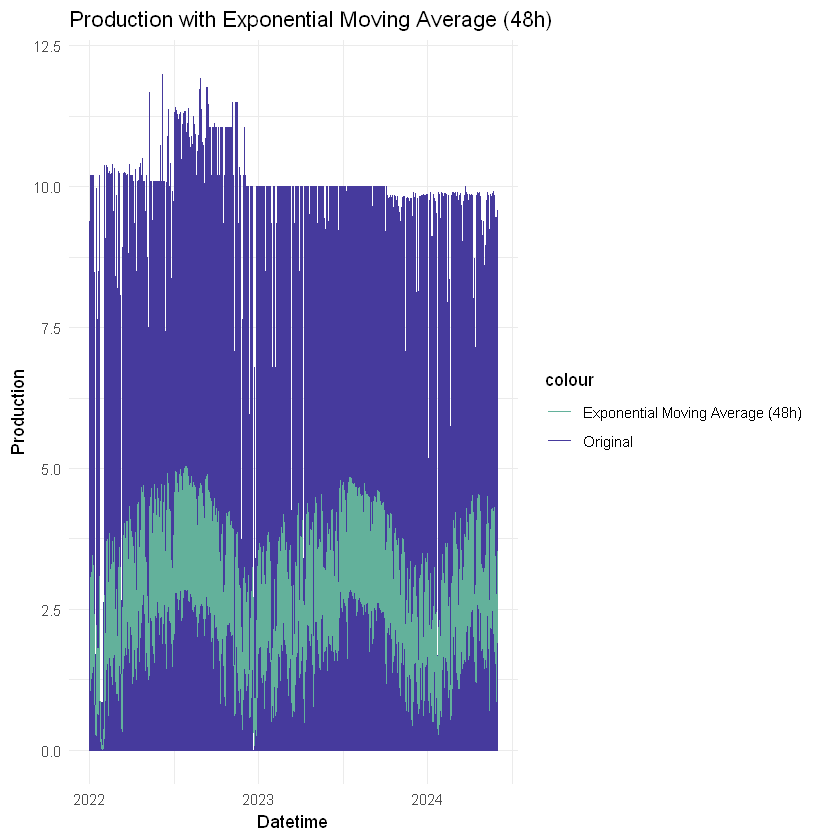

In [123]:
final_data <- final_data %>%
  mutate(
    ema_production_48 = TTR::EMA(production, n = 48)
  )

# Plot original data and exponential moving average
ggplot(final_data, aes(x = datetime)) +
  geom_line(aes(y = production, color = "Original")) +
  geom_line(aes(y = ema_production_48, color = "Exponential Moving Average (48h)")) +
  labs(title = "Production with Exponential Moving Average (48h)", x = "Datetime", y = "Production") +
  theme_minimal() +
  scale_color_manual(values = c("Original" = "#463a9d", "Exponential Moving Average (48h)" = "#63b19b"))

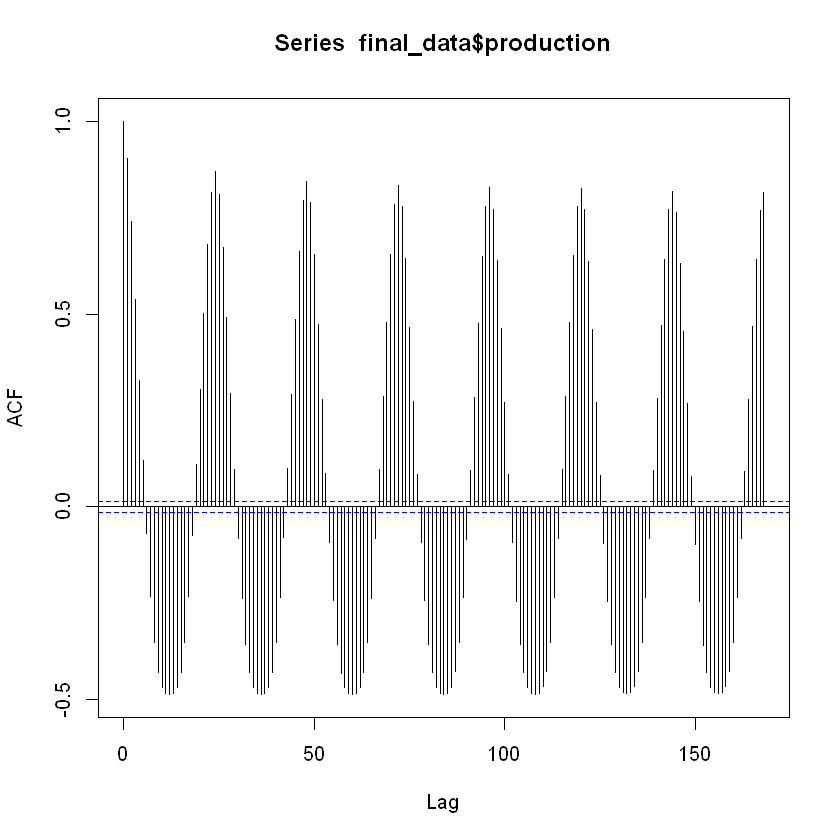

In [124]:
acf(final_data$production,168) #for 1 week interval

- Looking at the last two plots, decided creating interaction terms between key weather variables and time-based features would be beneficial later.
- Creating lagged features (24 and 48 hour lags) can also help.

In [125]:
print(colnames(final_data))

 [1] "date"                        "hour"                       
 [3] "production"                  "datetime"                   
 [5] "avg_DSWRF_surface"           "avg_TCDC_low_cloud_layer"   
 [7] "avg_TCDC_middle_cloud_layer" "avg_TCDC_high_cloud_layer"  
 [9] "avg_TCDC_entire_atmosphere"  "avg_USWRF_top_of_atmosphere"
[11] "avg_CSNOW_surface"           "avg_DLWRF_surface"          
[13] "avg_USWRF_surface"           "avg_TMP_surface"            
[15] "ema_production_48"          


In [126]:
final_data <- final_data %>%
  select(-date)

In [127]:
final_data <- final_data %>%
  filter(hour >= 5 & hour <= 18)

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 28 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 28 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 28 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 28 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 28 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 28 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 28 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 28 

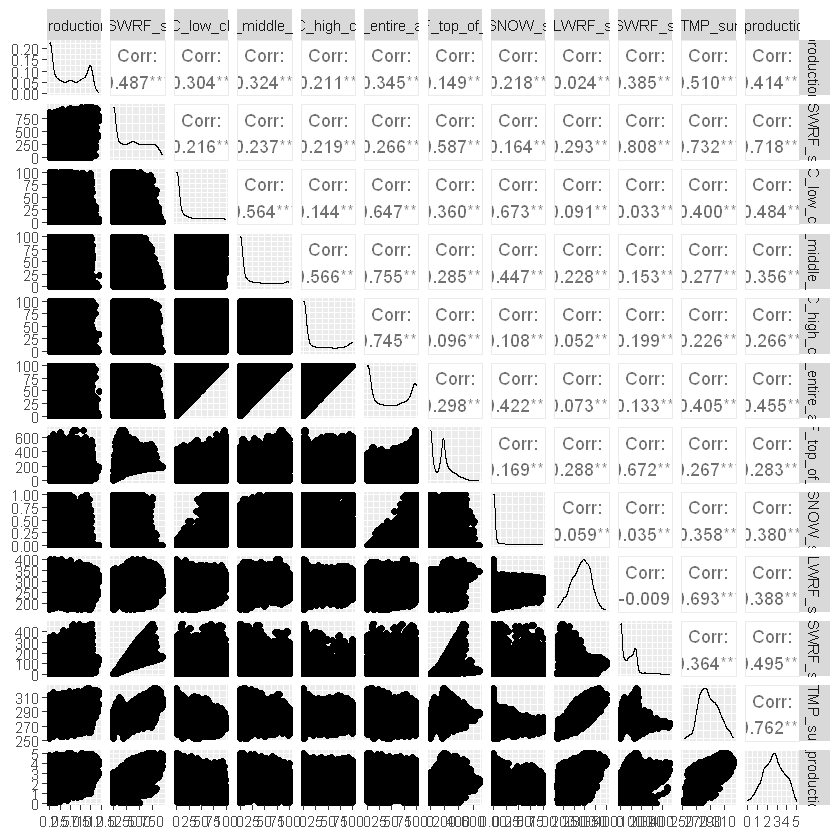

In [128]:
ggpairs(final_data %>% select(-datetime, -hour))

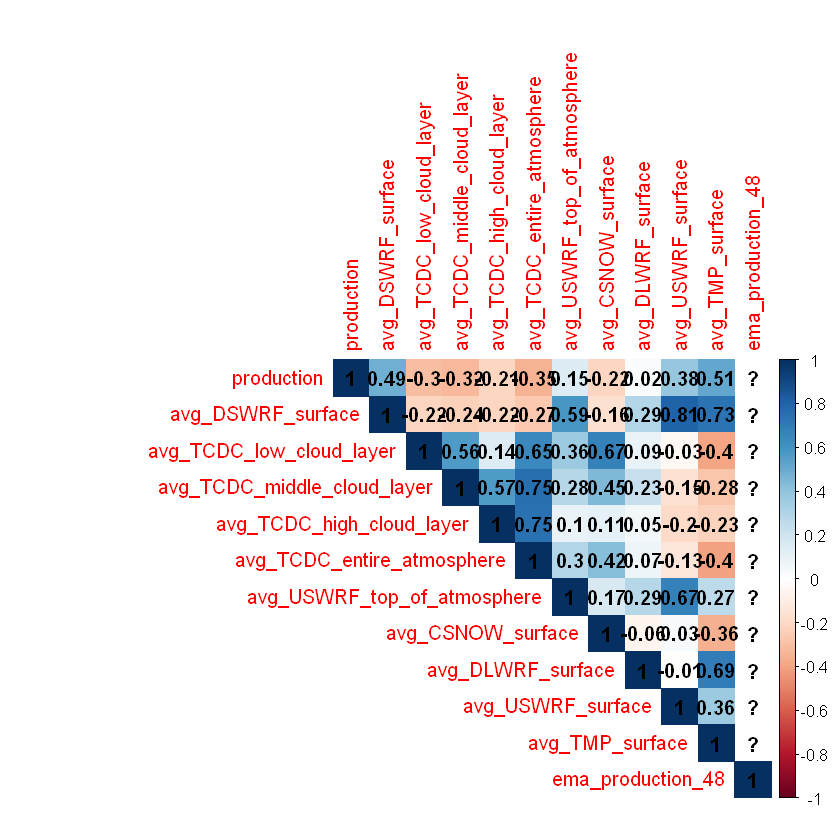

In [129]:
# Exclude the 'hour' column and calculate the correlation matrix
correlation_matrix <- cor(final_data[, !(names(final_data) %in% c("datetime", "hour"))])

# Plot the correlation heatmap with correlation values displayed
corrplot(correlation_matrix, method = "color", type = "upper", addCoef.col = "black")

In [130]:
hour_levels <- c("hour05", "hour06", "hour07", "hour08", "hour09", 
                 "hour10", "hour11", "hour12", "hour13", "hour14", 
                 "hour15", "hour16", "hour17", "hour18")

# Ensure 'hour' is a factor with specific categories
final_data <- final_data %>%
  mutate(hour = factor(paste0("hour", sprintf("%02d", hour(datetime))),
                       levels = hour_levels))


In [131]:
model <- lm(production ~ hour + avg_DSWRF_surface + avg_TMP_surface + avg_USWRF_surface + 
             avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface , 
            data = final_data)

# Summary of the model
summary(model)


Call:
lm(formula = production ~ hour + avg_DSWRF_surface + avg_TMP_surface + 
    avg_USWRF_surface + avg_TCDC_low_cloud_layer + avg_DLWRF_surface + 
    avg_CSNOW_surface, data = final_data)

Residuals:
   Min     1Q Median     3Q    Max 
-8.991 -1.015  0.104  1.233  8.607 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -4.397e+01  1.205e+00 -36.487  < 2e-16 ***
hourhour06                5.782e-01  9.059e-02   6.383 1.80e-10 ***
hourhour07                2.446e+00  9.093e-02  26.898  < 2e-16 ***
hourhour08                4.467e+00  9.308e-02  47.993  < 2e-16 ***
hourhour09                5.494e+00  9.828e-02  55.906  < 2e-16 ***
hourhour10                5.035e+00  1.057e-01  47.629  < 2e-16 ***
hourhour11                4.533e+00  1.105e-01  41.025  < 2e-16 ***
hourhour12                4.080e+00  1.144e-01  35.675  < 2e-16 ***
hourhour13                3.576e+00  1.166e-01  30.675  < 2e-16 ***
hourhour14                2.

- Below code implements the multicollinearity check.

In [132]:
library(car)

# Calculate VIF values
vif_values <- vif(model)

# Print VIF values
print(vif_values)

# Check for high VIF values
high_vif <- vif_values[vif_values > 10]
print(high_vif)

                              GVIF Df GVIF^(1/(2*Df))
hour                      6.202706 13        1.072714
avg_DSWRF_surface        13.374893  1        3.657170
avg_TMP_surface          15.532053  1        3.941073
avg_USWRF_surface         4.421504  1        2.102737
avg_TCDC_low_cloud_layer  3.701022  1        1.923804
avg_DLWRF_surface         6.544203  1        2.558164
avg_CSNOW_surface         1.916578  1        1.384405
[1] 13.37489 15.53205 13.00000


- Model without avg_TMP_surface is below.

In [133]:
model <- lm(production ~ hour + avg_DSWRF_surface + avg_USWRF_surface + 
            avg_TCDC_low_cloud_layer +avg_DLWRF_surface + avg_CSNOW_surface , 
            data = final_data)

# Summary of the model
summary(model)


Call:
lm(formula = production ~ hour + avg_DSWRF_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface, 
    data = final_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5950 -1.0877  0.1567  1.4096  8.0420 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.0056377  0.1577120   0.036 0.971485    
hourhour06                0.5920817  0.0954272   6.205 5.66e-10 ***
hourhour07                2.7325127  0.0954399  28.631  < 2e-16 ***
hourhour08                5.2361918  0.0955451  54.803  < 2e-16 ***
hourhour09                6.8527343  0.0959436  71.425  < 2e-16 ***
hourhour10                5.2936275  0.1111122  47.642  < 2e-16 ***
hourhour11                4.9777248  0.1157097  43.019  < 2e-16 ***
hourhour12                4.5830737  0.1196212  38.313  < 2e-16 ***
hourhour13                4.0019081  0.1222141  32.745  < 2e-16 ***
hourhour14                2.8839380 

- Model without avg_DSWRF_surface is below.    

In [134]:
model2 <- lm(production ~ hour + avg_TMP_surface + avg_USWRF_surface + 
            avg_TCDC_low_cloud_layer +avg_DLWRF_surface + avg_CSNOW_surface , 
            data = final_data)

# Summary of the model
summary(model2)


Call:
lm(formula = production ~ hour + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface, 
    data = final_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0224 -1.0133  0.1023  1.2359  8.6564 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -4.144e+01  8.572e-01 -48.343  < 2e-16 ***
hourhour06                5.785e-01  9.061e-02   6.384 1.79e-10 ***
hourhour07                2.459e+00  9.085e-02  27.067  < 2e-16 ***
hourhour08                4.502e+00  9.237e-02  48.739  < 2e-16 ***
hourhour09                5.554e+00  9.627e-02  57.691  < 2e-16 ***
hourhour10                4.968e+00  1.033e-01  48.074  < 2e-16 ***
hourhour11                4.463e+00  1.080e-01  41.326  < 2e-16 ***
hourhour12                4.002e+00  1.114e-01  35.929  < 2e-16 ***
hourhour13                3.488e+00  1.128e-01  30.926  < 2e-16 ***
hourhour14                2.561e+00  1

Looking at R-squared values, decided to move on without avg_DSWRF_surface as a predictor.

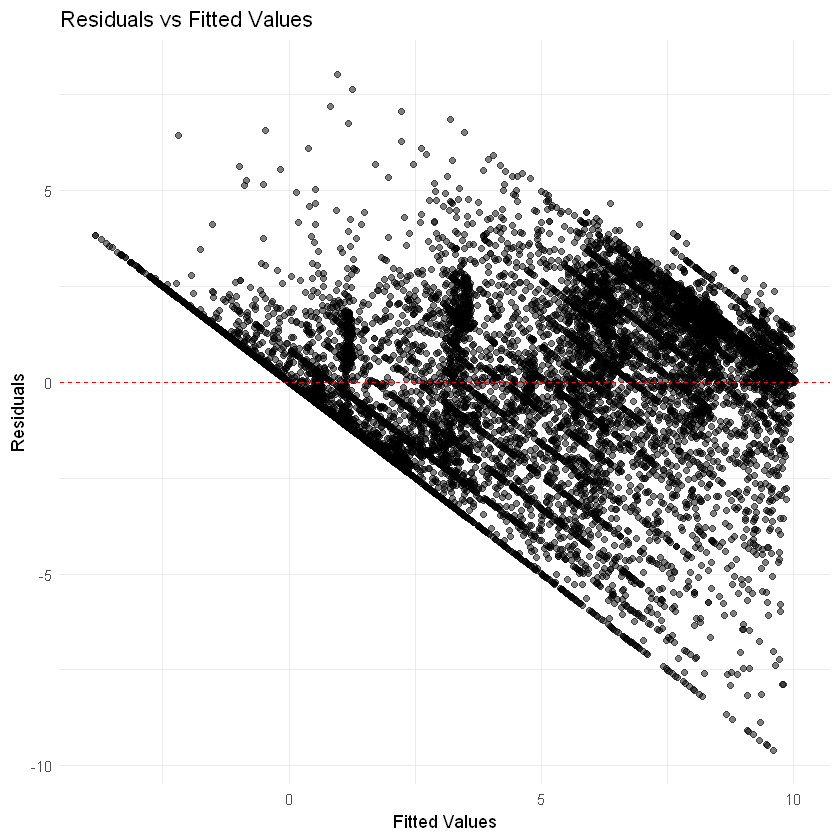

In [135]:
# Extract residuals and fitted values
residuals <- residuals(model)
fitted_values <- fitted.values(model)

# Create a data frame with these values
residuals_data <- data.frame(Fitted = fitted_values, Residuals = residuals)

# Plot residuals vs fitted values using ggplot2
ggplot(residuals_data, aes(x = Fitted, y = Residuals)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal()

In [136]:
library(zoo)
# Define the time window for rolling calculations
time_window <- 24

# Calculate rolling mean and variance
final_data <- final_data %>%
  mutate(
    rolling_mean_production = rollmean(production, time_window, fill = NA, align = 'left'),
    rolling_var_production = rollapply(production, time_window, var, fill = NA, align = 'left')
  )

# Drop rows with NA values introduced by moving averages
final_data <- final_data %>%
  drop_na(rolling_mean_production)

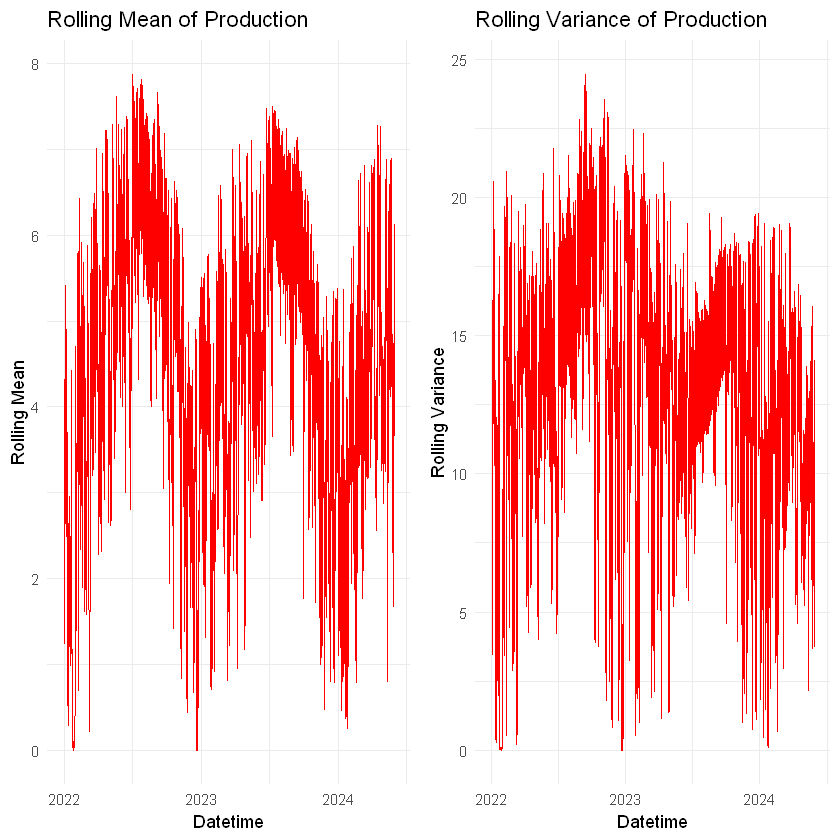

In [137]:
# Plot Rolling Mean
mean_plot <- ggplot(final_data, aes(x = datetime, y = rolling_mean_production)) +
  geom_line(color = 'red') +
  labs(title = "Rolling Mean of Production", x = "Datetime", y = "Rolling Mean") +
  theme_minimal()

# Plot Rolling Variance
variance_plot <- ggplot(final_data, aes(x = datetime, y = rolling_var_production)) +
  geom_line(color = 'red') +
  labs(title = "Rolling Variance of Production", x = "Datetime", y = "Rolling Variance") +
  theme_minimal()

# Display the plots side by side
library(gridExtra)
grid.arrange(mean_plot, variance_plot, ncol = 2)


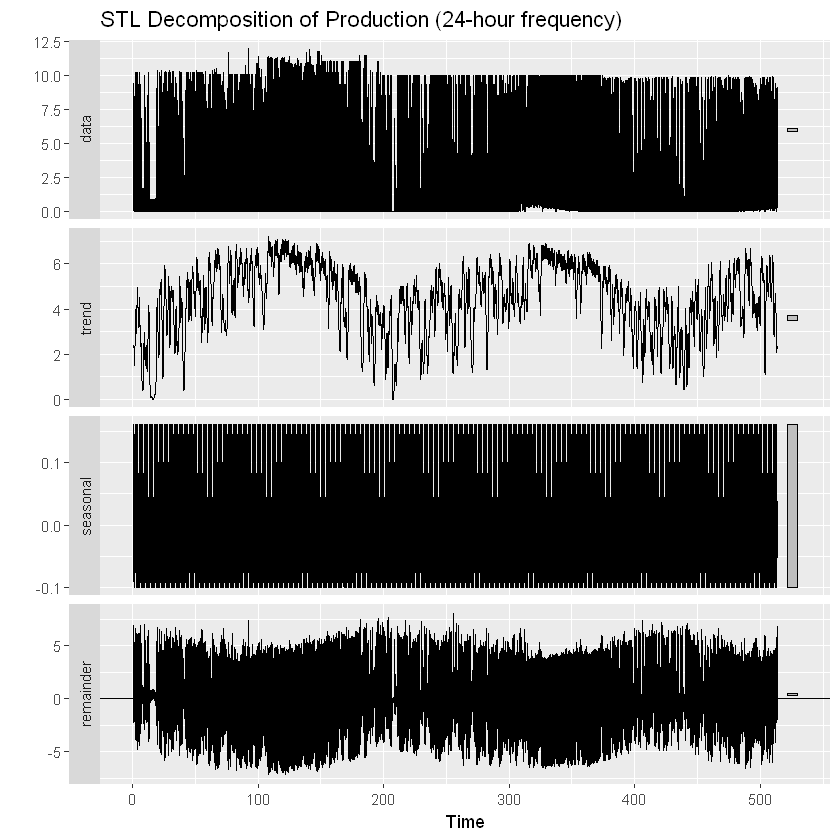

In [138]:
library(forecast)

# Ensure 'final_data' is ordered by datetime
final_data <- final_data %>% arrange(datetime)

# STL decomposition with 48-hour frequency
stl_fit <- stl(ts(final_data$production, frequency = 24), s.window = "periodic")

# Extract components
final_data$seasonal <- stl_fit$time.series[, "seasonal"]
final_data$trend <- stl_fit$time.series[, "trend"]
final_data$remainder <- stl_fit$time.series[, "remainder"]

# Plot the components
autoplot(stl_fit) + ggtitle("STL Decomposition of Production (24-hour frequency)")

In [139]:
print(colnames(final_data))

 [1] "hour"                        "production"                 
 [3] "datetime"                    "avg_DSWRF_surface"          
 [5] "avg_TCDC_low_cloud_layer"    "avg_TCDC_middle_cloud_layer"
 [7] "avg_TCDC_high_cloud_layer"   "avg_TCDC_entire_atmosphere" 
 [9] "avg_USWRF_top_of_atmosphere" "avg_CSNOW_surface"          
[11] "avg_DLWRF_surface"           "avg_USWRF_surface"          
[13] "avg_TMP_surface"             "ema_production_48"          
[15] "rolling_mean_production"     "rolling_var_production"     
[17] "seasonal"                    "trend"                      
[19] "remainder"                  


In [140]:
model <- lm(production ~  hour + avg_TMP_surface + avg_USWRF_surface + 
            avg_TCDC_low_cloud_layer +avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal + rolling_mean_production, 
            data = final_data)

# Summary of the model with transformed production
summary(model)


Call:
lm(formula = production ~ hour + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + rolling_mean_production, data = final_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0576 -1.1515  0.1107  1.1945  7.6859 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.455e+01  8.833e-01 -27.795  < 2e-16 ***
hourhour06                6.499e-01  8.456e-02   7.685 1.65e-14 ***
hourhour07                2.723e+00  8.472e-02  32.139  < 2e-16 ***
hourhour08                5.150e+00  8.732e-02  58.978  < 2e-16 ***
hourhour09                6.616e+00  9.230e-02  71.685  < 2e-16 ***
hourhour10                6.791e+00  1.043e-01  65.106  < 2e-16 ***
hourhour11                6.540e+00  1.111e-01  58.841  < 2e-16 ***
hourhour12                6.288e+00  1.167e-01  53.870  < 2e-16 ***
hourhour13                5.747e+00  1.183e-01  48.590  < 2e-

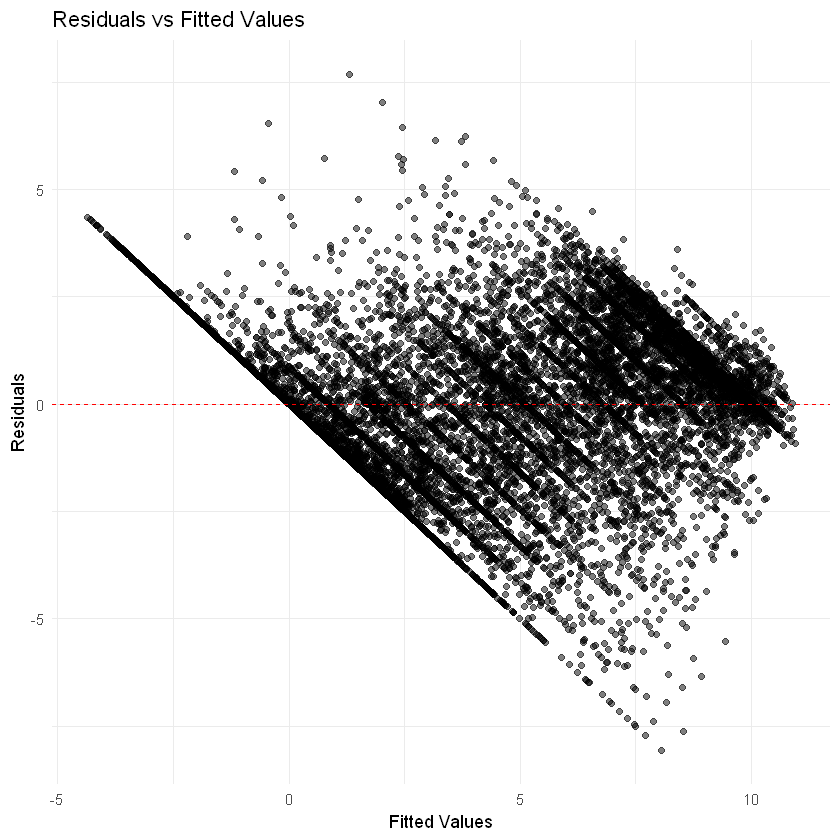

In [141]:
# Extract residuals and fitted values
residuals <- residuals(model)
fitted_values <- fitted.values(model)

# Create a data frame with these values
residuals_data <- data.frame(Fitted = fitted_values, Residuals = residuals)

# Plot residuals vs fitted values using ggplot2
ggplot(residuals_data, aes(x = Fitted, y = Residuals)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal()


	Breusch-Godfrey test for serial correlation of order up to 25

data:  Residuals
LM test = 5754, df = 25, p-value < 2.2e-16


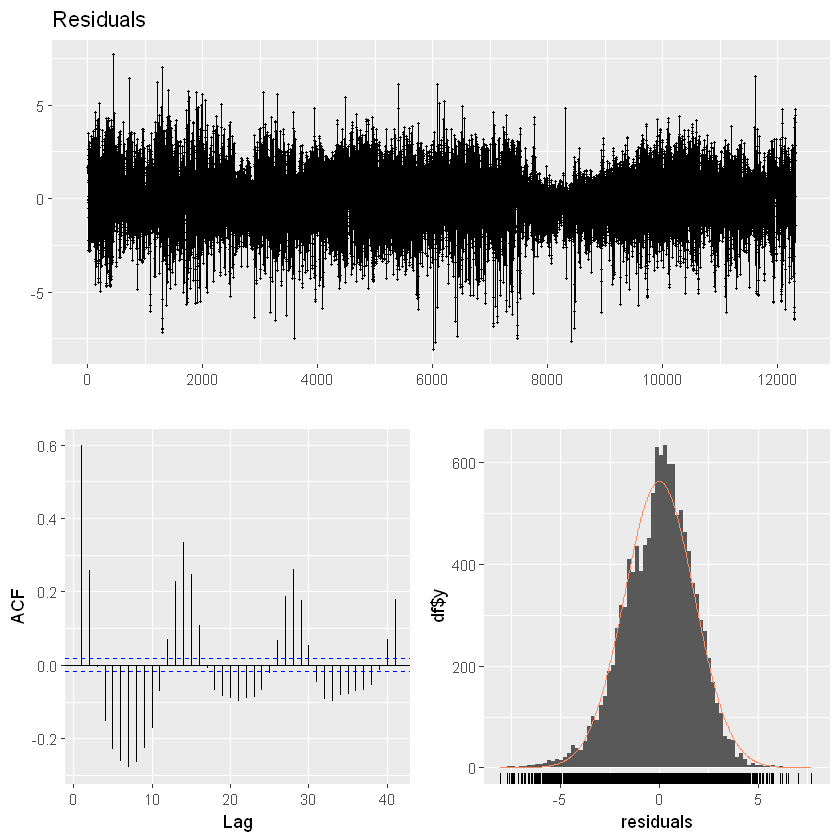

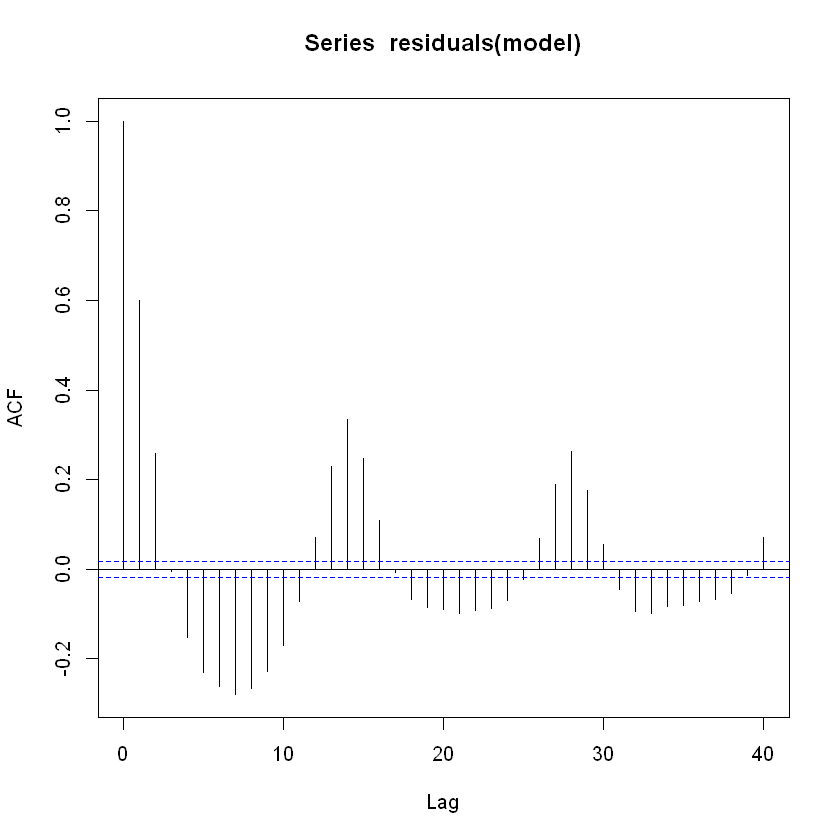

In [142]:
# Check residuals
checkresiduals(model)

# ACF of residuals
acf(residuals(model))

In [143]:
#Add Lagged Variables
final_data <- final_data %>%
  arrange(datetime) %>%
  mutate(
    lag1_production = lag(production, 48)
  ) %>%
  drop_na()  # Remove rows with NA values introduced by lagging

# Step 2: Fit the Linear Regression Model with Lagged Variables
model_with_lags <- lm(production ~ hour + avg_TMP_surface + avg_USWRF_surface + 
                      avg_TCDC_low_cloud_layer +avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
                      lag1_production+rolling_mean_production,
                      data = final_data)

# Step 3: Summary of the Model with Lags
summary(model_with_lags)


Call:
lm(formula = production ~ hour + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + rolling_mean_production, 
    data = final_data)

Residuals:
   Min     1Q Median     3Q    Max 
-8.020 -1.140  0.101  1.190  7.242 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.462e+01  8.839e-01 -27.858  < 2e-16 ***
hourhour06                5.863e-01  8.485e-02   6.909 5.11e-12 ***
hourhour07                2.554e+00  8.720e-02  29.291  < 2e-16 ***
hourhour08                4.848e+00  9.456e-02  51.269  < 2e-16 ***
hourhour09                6.211e+00  1.040e-01  59.734  < 2e-16 ***
hourhour10                6.339e+00  1.170e-01  54.191  < 2e-16 ***
hourhour11                6.091e+00  1.231e-01  49.458  < 2e-16 ***
hourhour12                5.876e+00  1.265e-01  46.470  < 2e-16 ***
hourhour13                5.468e+00  1.230e-01  

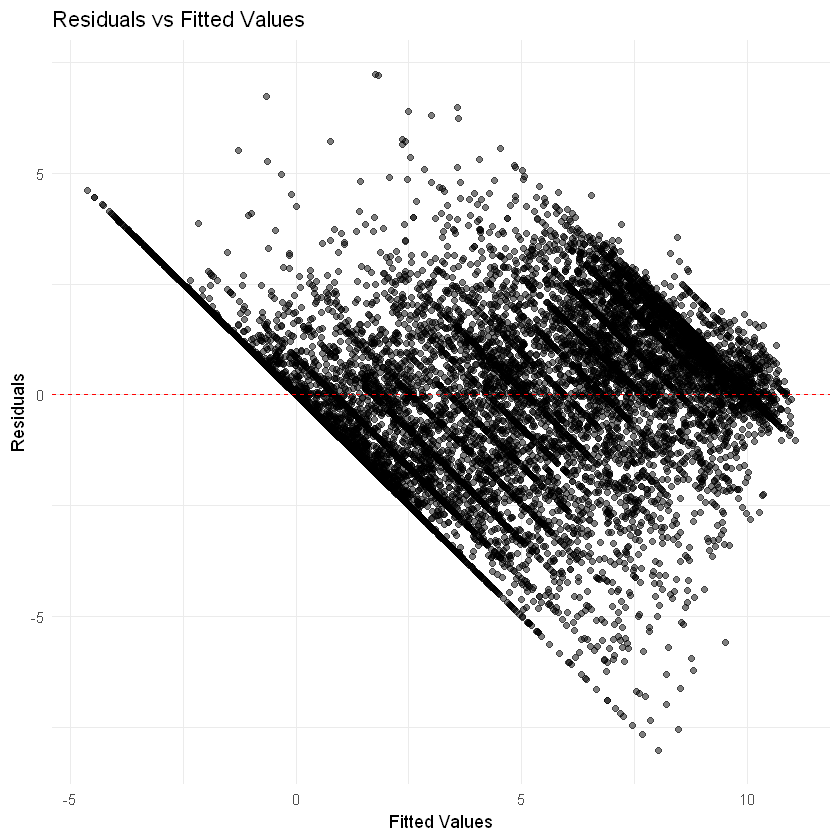

In [144]:
# Extract residuals and fitted values
residuals <- residuals(model_with_lags)
fitted_values <- fitted.values(model_with_lags)

# Create a data frame with these values
residuals_data <- data.frame(Fitted = fitted_values, Residuals = residuals)

# Plot residuals vs fitted values using ggplot2
ggplot(residuals_data, aes(x = Fitted, y = Residuals)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal()


	Breusch-Godfrey test for serial correlation of order up to 26

data:  Residuals
LM test = 5706.3, df = 26, p-value < 2.2e-16


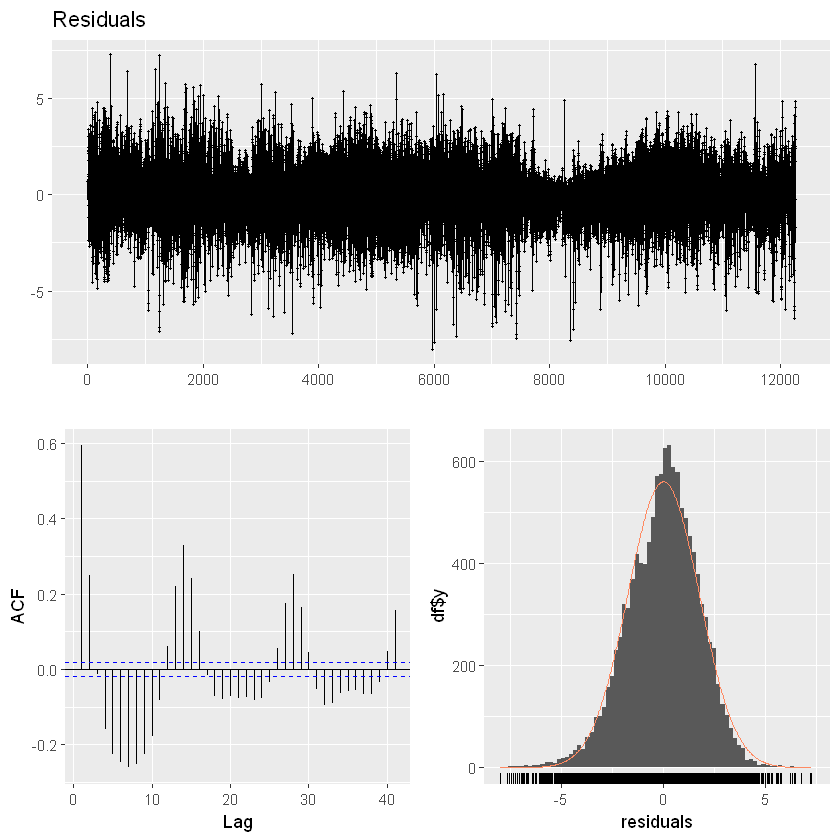

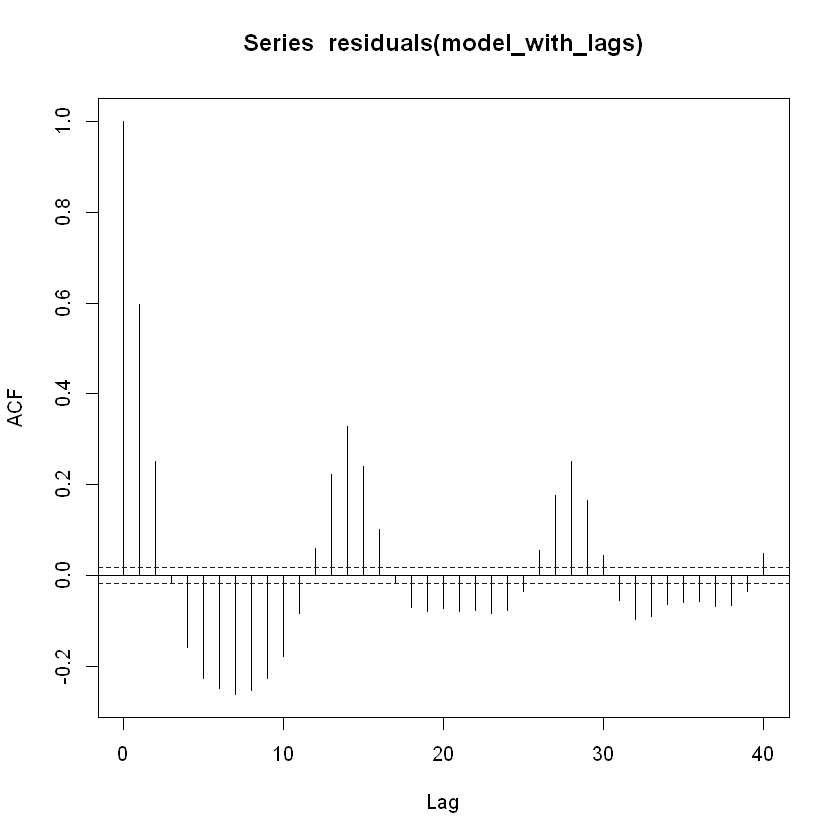

In [145]:
# Check residuals
checkresiduals(model_with_lags)

# ACF of residuals
acf(residuals(model_with_lags))

In [146]:
#Add Lagged Variables
final_data <- final_data %>%
  arrange(datetime) %>%
  mutate(
    lag2_production = lag(production, 72),
  ) %>%
  drop_na()  # Remove rows with NA values introduced by lagging

# Step 2: Fit the Linear Regression Model with Lagged Variables
model_with_lags2 <- lm(production ~ hour + avg_TMP_surface + avg_USWRF_surface + 
                       avg_TCDC_low_cloud_layer +avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
                       lag2_production+rolling_mean_production,
                       data = final_data)

# Step 3: Summary of the Model with Lags
summary(model_with_lags2)


Call:
lm(formula = production ~ hour + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag2_production + rolling_mean_production, 
    data = final_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0089 -1.1485  0.1118  1.1955  7.6439 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.531e+01  9.201e-01 -27.511  < 2e-16 ***
hourhour06                6.473e-01  8.519e-02   7.598 3.23e-14 ***
hourhour07                2.735e+00  8.545e-02  32.013  < 2e-16 ***
hourhour08                5.148e+00  8.801e-02  58.490  < 2e-16 ***
hourhour09                6.602e+00  9.329e-02  70.772  < 2e-16 ***
hourhour10                6.770e+00  1.075e-01  62.973  < 2e-16 ***
hourhour11                6.526e+00  1.168e-01  55.851  < 2e-16 ***
hourhour12                6.279e+00  1.231e-01  51.014  < 2e-16 ***
hourhour13                5.736e+00  1

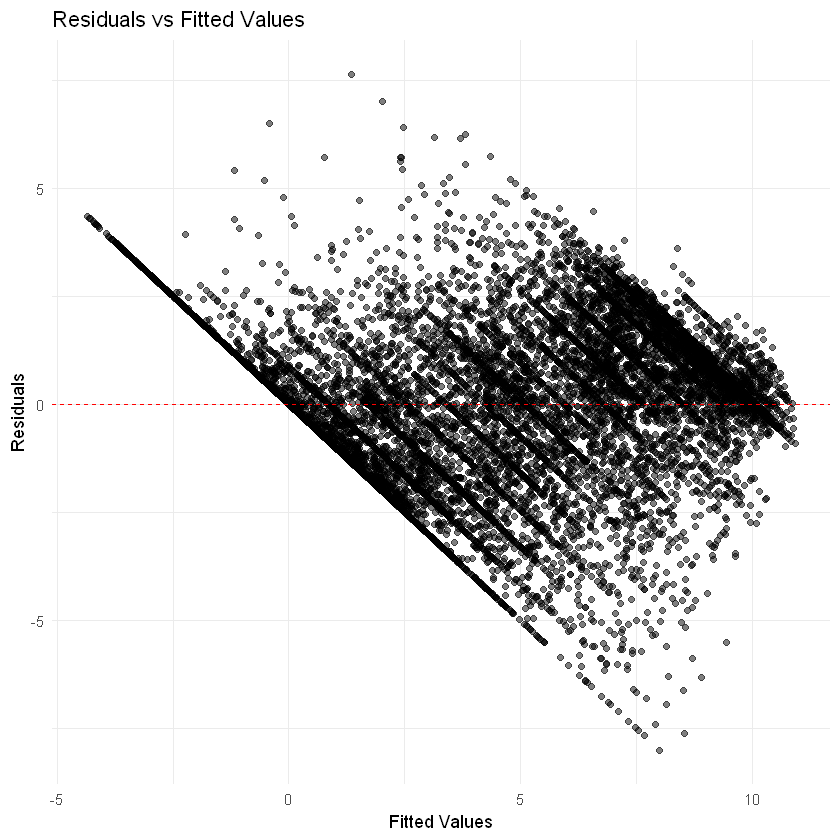

In [147]:
# Extract residuals and fitted values
residuals <- residuals(model_with_lags2)
fitted_values <- fitted.values(model_with_lags2)

# Create a data frame with these values
residuals_data <- data.frame(Fitted = fitted_values, Residuals = residuals)

# Plot residuals vs fitted values using ggplot2
ggplot(residuals_data, aes(x = Fitted, y = Residuals)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal()


	Breusch-Godfrey test for serial correlation of order up to 26

data:  Residuals
LM test = 5713.4, df = 26, p-value < 2.2e-16


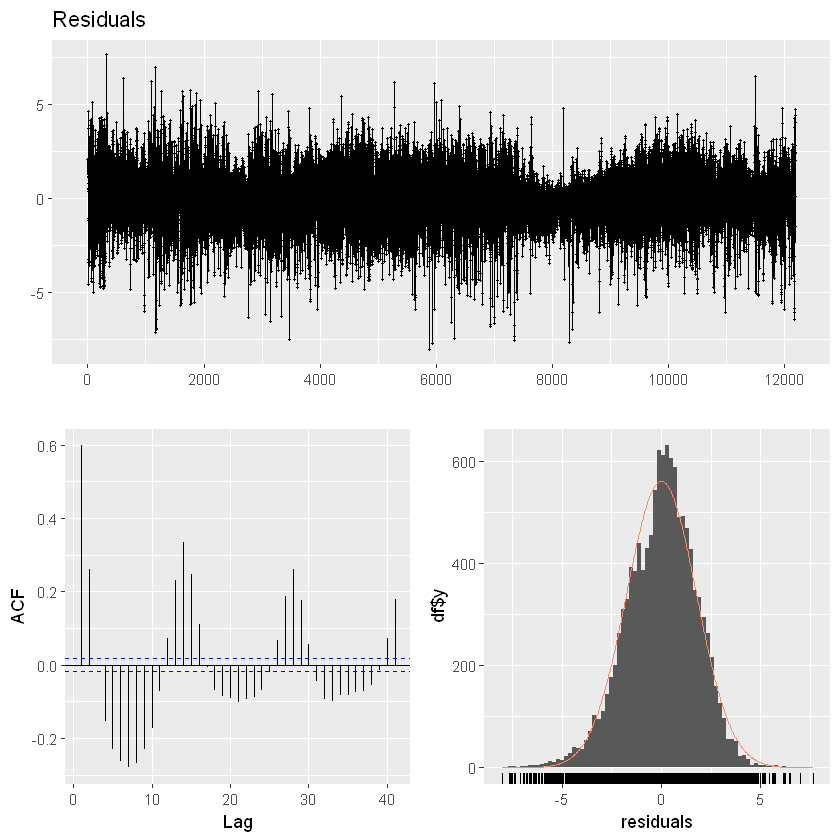

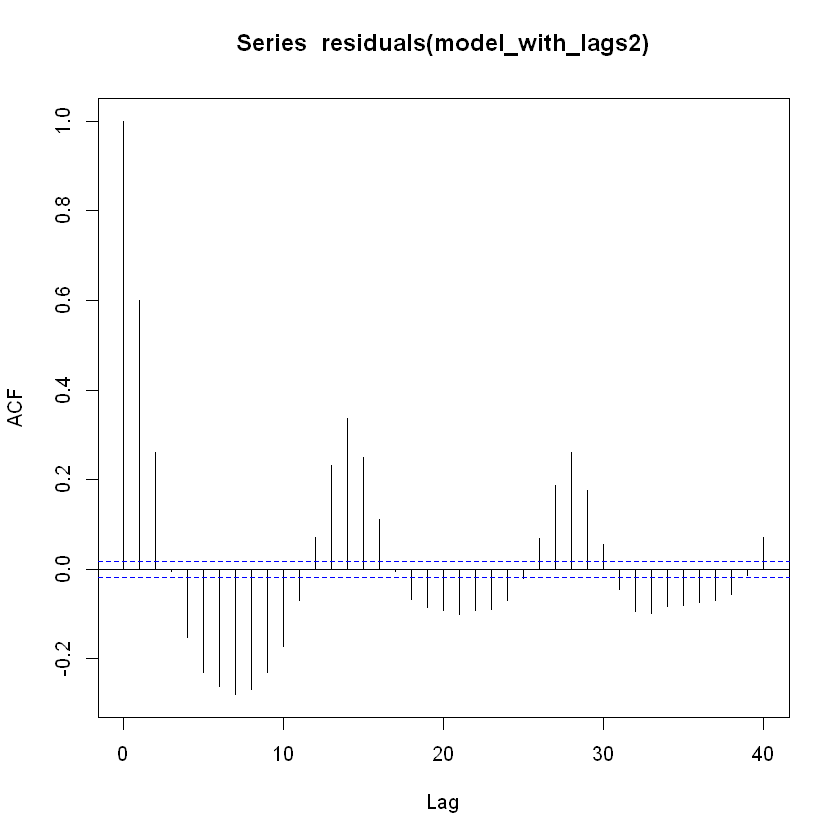

In [148]:
# Check residuals
checkresiduals(model_with_lags2)

# ACF of residuals
acf(residuals(model_with_lags2))

In [149]:
# Step 2: Fit the Linear Regression Model with Lagged Variables
model_with_lags3 <- lm(production ~ hour + avg_TMP_surface + avg_USWRF_surface + 
                       avg_TCDC_low_cloud_layer +avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
                       lag1_production+ lag2_production+rolling_mean_production,
                       data = final_data)

# Step 3: Summary of the Model with Lags
summary(model_with_lags3)


Call:
lm(formula = production ~ hour + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + lag2_production + rolling_mean_production, 
    data = final_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9835 -1.1365  0.1014  1.1894  7.2144 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.531e+01  9.173e-01 -27.587  < 2e-16 ***
hourhour06                5.831e-01  8.526e-02   6.839 8.34e-12 ***
hourhour07                2.557e+00  8.764e-02  29.175  < 2e-16 ***
hourhour08                4.834e+00  9.492e-02  50.930  < 2e-16 ***
hourhour09                6.185e+00  1.048e-01  59.032  < 2e-16 ***
hourhour10                6.305e+00  1.199e-01  52.588  < 2e-16 ***
hourhour11                6.057e+00  1.285e-01  47.141  < 2e-16 ***
hourhour12                5.848e+00  1.324e-01  44.163  < 2e-16 ***
hourhour13          

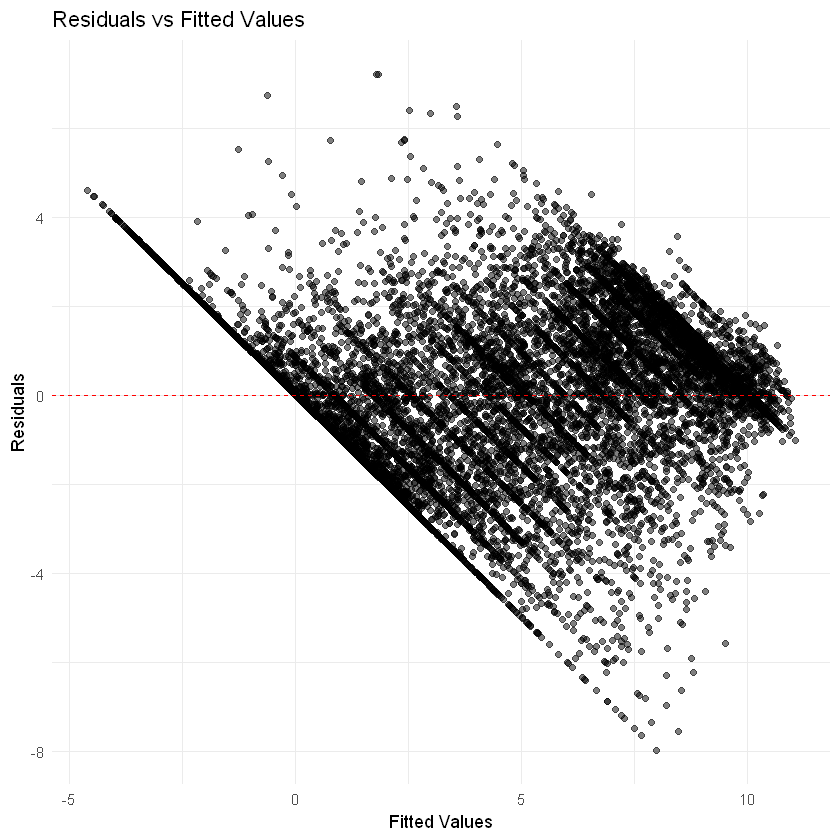

In [150]:
# Extract residuals and fitted values
residuals <- residuals(model_with_lags3)
fitted_values <- fitted.values(model_with_lags3)

# Create a data frame with these values
residuals_data <- data.frame(Fitted = fitted_values, Residuals = residuals)

# Plot residuals vs fitted values using ggplot2
ggplot(residuals_data, aes(x = Fitted, y = Residuals)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal()


	Breusch-Godfrey test for serial correlation of order up to 27

data:  Residuals
LM test = 5731.2, df = 27, p-value < 2.2e-16


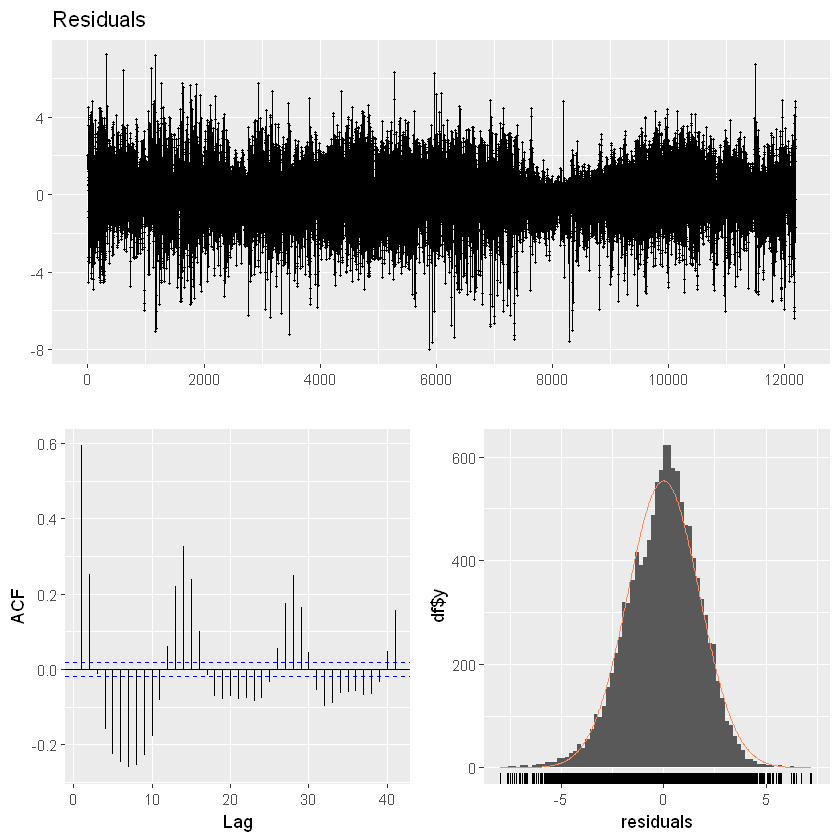

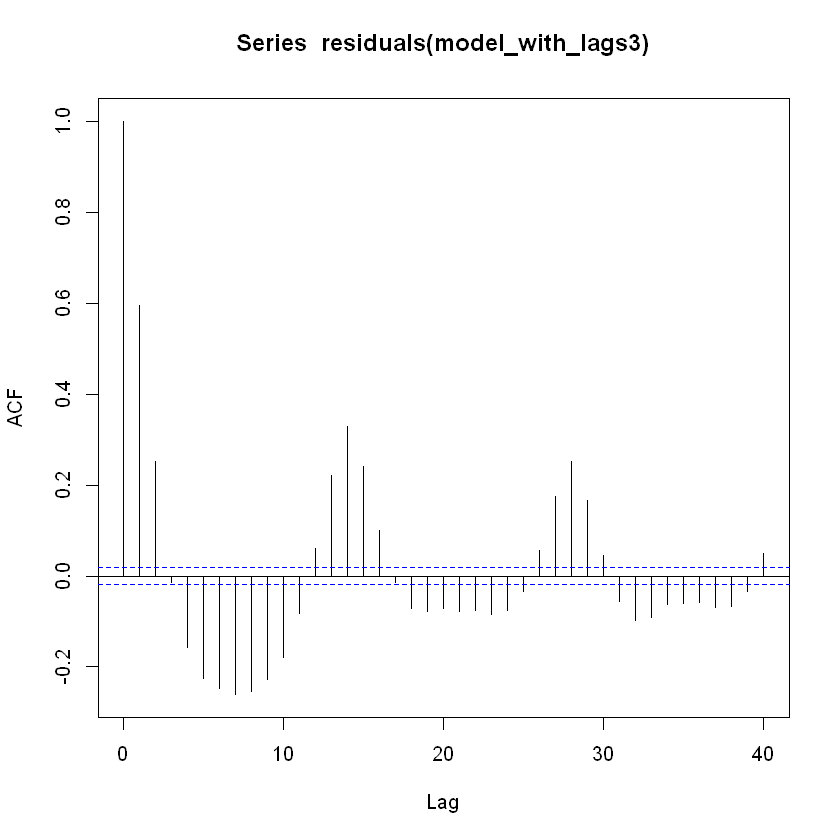

In [151]:
# Check residuals
checkresiduals(model_with_lags3)

# ACF of residuals
acf(residuals(model_with_lags3))

In [152]:
library(lubridate)

# Extract month and create season variable
final_data$month <- factor(month(final_data$datetime, label = TRUE))
final_data$season <- factor(ifelse(final_data$month %in% c("Dec", "Jan", "Feb"), "Winter",
                           ifelse(final_data$month %in% c("Mar", "Apr", "May"), "Spring",
                           ifelse(final_data$month %in% c("Jun", "Jul", "Aug"), "Summer", "Fall"))))

In [153]:
# Step 2: Fit the Linear Regression Model with Lagged Variables
model_with_lags3 <- lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
                       avg_TCDC_low_cloud_layer +avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
                       lag1_production+ lag2_production+rolling_mean_production,
                       data = final_data)

# Step 3: Summary of the Model with Lags
summary(model_with_lags3)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + lag2_production + rolling_mean_production, 
    data = final_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9919 -1.1362  0.1012  1.1893  7.2194 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.531e+01  9.174e-01 -27.585  < 2e-16 ***
hourhour06                5.830e-01  8.526e-02   6.838 8.43e-12 ***
hourhour07                2.557e+00  8.765e-02  29.171  < 2e-16 ***
hourhour08                4.834e+00  9.492e-02  50.926  < 2e-16 ***
hourhour09                6.185e+00  1.048e-01  59.030  < 2e-16 ***
hourhour10                6.305e+00  1.199e-01  52.580  < 2e-16 ***
hourhour11                6.058e+00  1.285e-01  47.130  < 2e-16 ***
hourhour12                5.849e+00  1.325e-01  44.149  < 2e-16 ***
hourhour13 

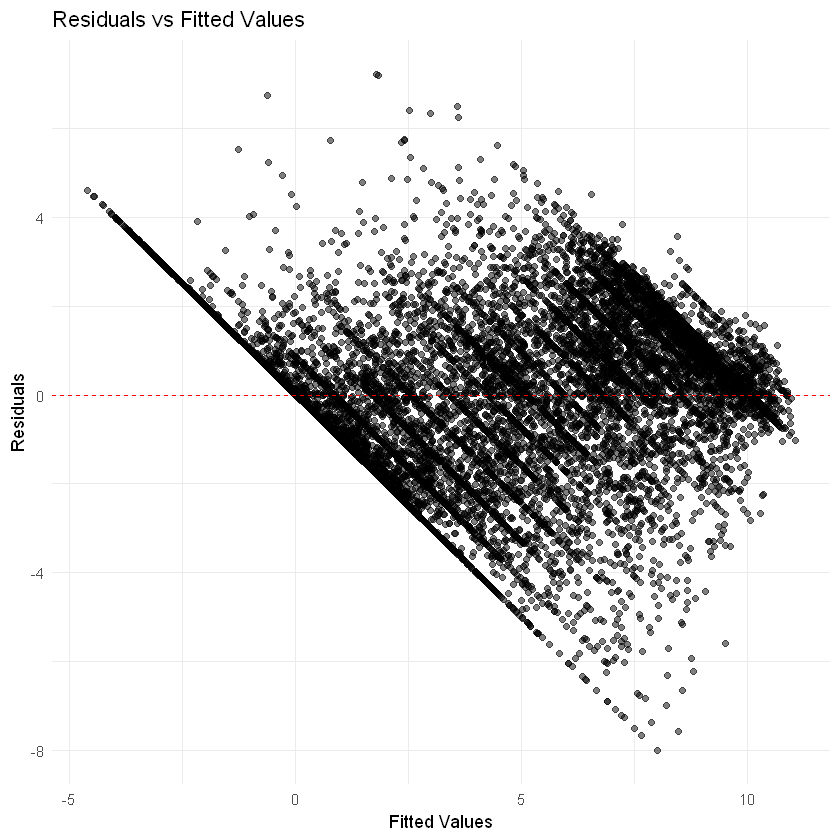

In [154]:
# Extract residuals and fitted values
residuals <- residuals(model_with_lags3)
fitted_values <- fitted.values(model_with_lags3)

# Create a data frame with these values
residuals_data <- data.frame(Fitted = fitted_values, Residuals = residuals)

# Plot residuals vs fitted values using ggplot2
ggplot(residuals_data, aes(x = Fitted, y = Residuals)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal()


	Breusch-Godfrey test for serial correlation of order up to 28

data:  Residuals
LM test = 5780.7, df = 28, p-value < 2.2e-16


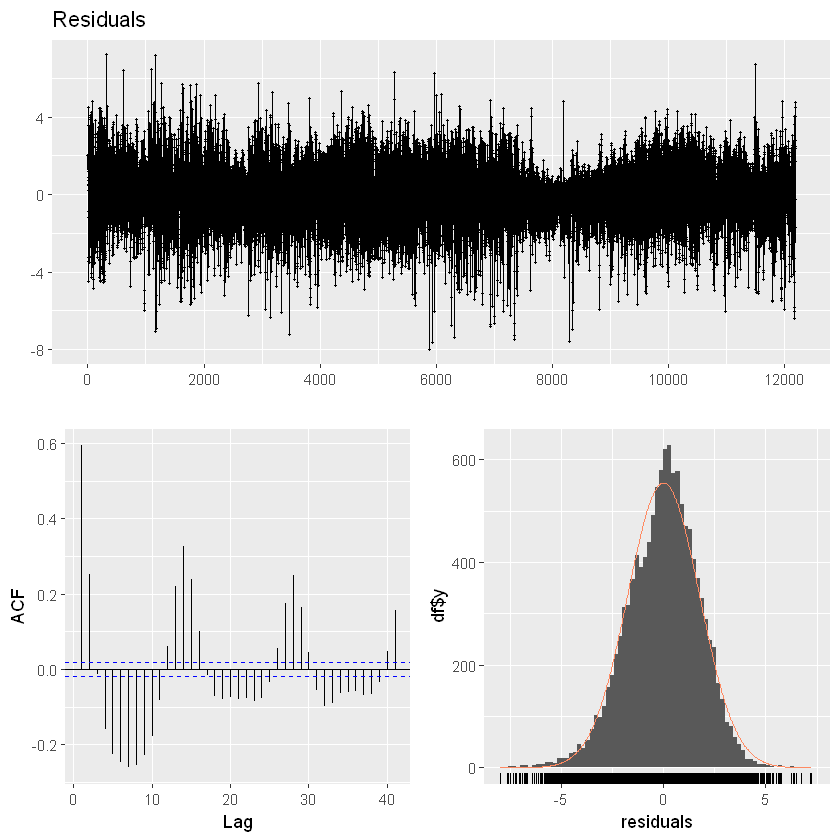

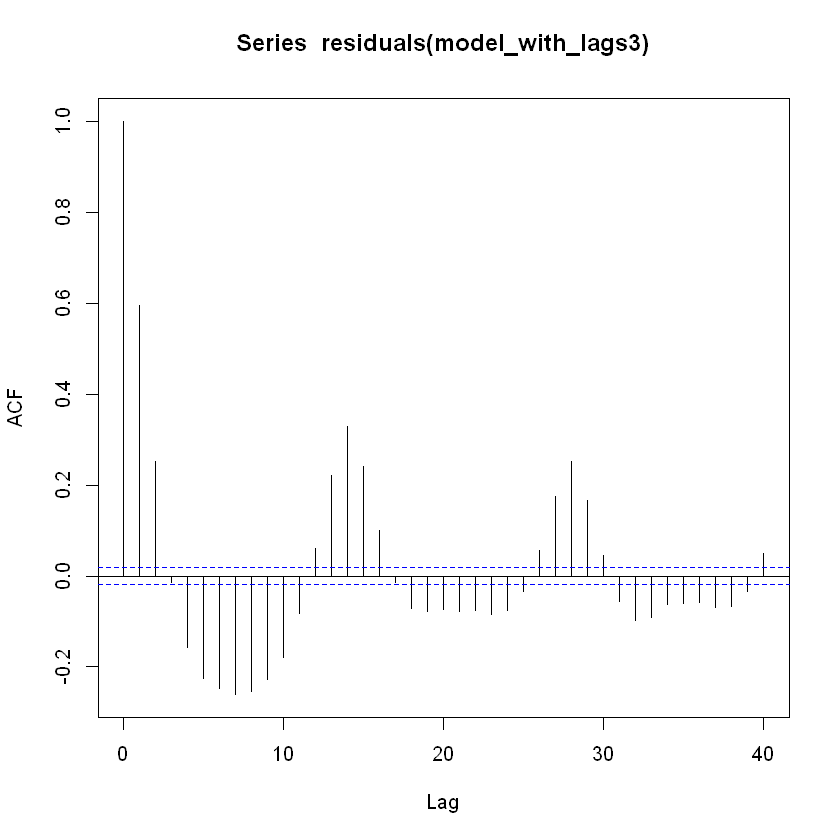

In [155]:
# Check residuals
checkresiduals(model_with_lags3)

# ACF of residuals
acf(residuals(model_with_lags3))

In [156]:
#Add Lagged Variables
final_data <- final_data %>%
  arrange(datetime) %>%
  mutate(
    lag2_production = lag(production, 72),
  ) %>%
  drop_na()  # Remove rows with NA values introduced by lagging

# Step 2: Fit the Linear Regression Model with Lagged Variables
model_with_lags2 <- lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
                       avg_TCDC_low_cloud_layer +avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
                       lag2_production+rolling_mean_production,
                       data = final_data)

# Step 3: Summary of the Model with Lags
summary(model_with_lags2)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag2_production + rolling_mean_production, 
    data = final_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0338 -1.1395  0.1099  1.1932  7.6511 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.506e+01  9.215e-01 -27.194  < 2e-16 ***
hourhour06                6.494e-01  8.524e-02   7.619 2.75e-14 ***
hourhour07                2.751e+00  8.549e-02  32.174  < 2e-16 ***
hourhour08                5.173e+00  8.810e-02  58.720  < 2e-16 ***
hourhour09                6.639e+00  9.344e-02  71.057  < 2e-16 ***
hourhour10                6.813e+00  1.078e-01  63.203  < 2e-16 ***
hourhour11                6.567e+00  1.171e-01  56.064  < 2e-16 ***
hourhour12                6.324e+00  1.234e-01  51.244  < 2e-16 ***
hourhour13                5.7

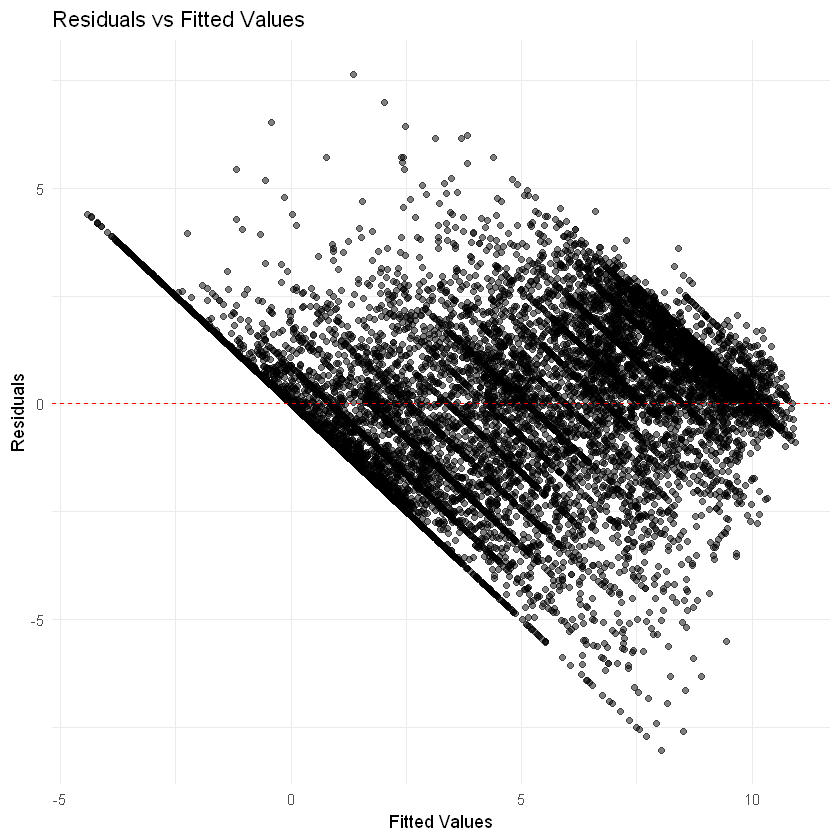

In [157]:
# Extract residuals and fitted values
residuals <- residuals(model_with_lags2)
fitted_values <- fitted.values(model_with_lags2)

# Create a data frame with these values
residuals_data <- data.frame(Fitted = fitted_values, Residuals = residuals)

# Plot residuals vs fitted values using ggplot2
ggplot(residuals_data, aes(x = Fitted, y = Residuals)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal()


	Breusch-Godfrey test for serial correlation of order up to 27

data:  Residuals
LM test = 5716.1, df = 27, p-value < 2.2e-16


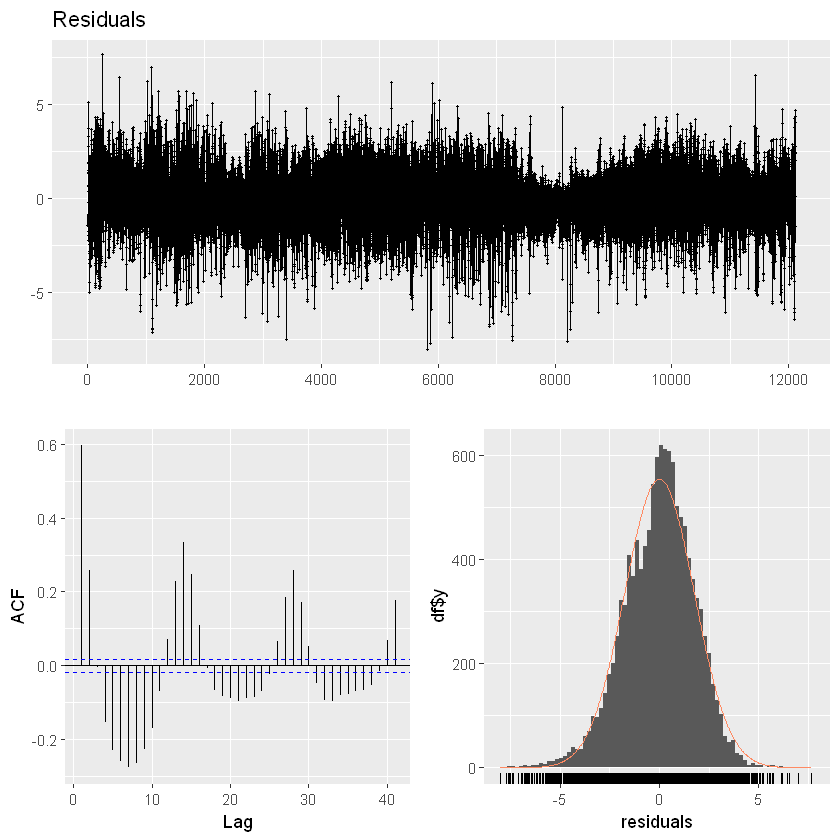

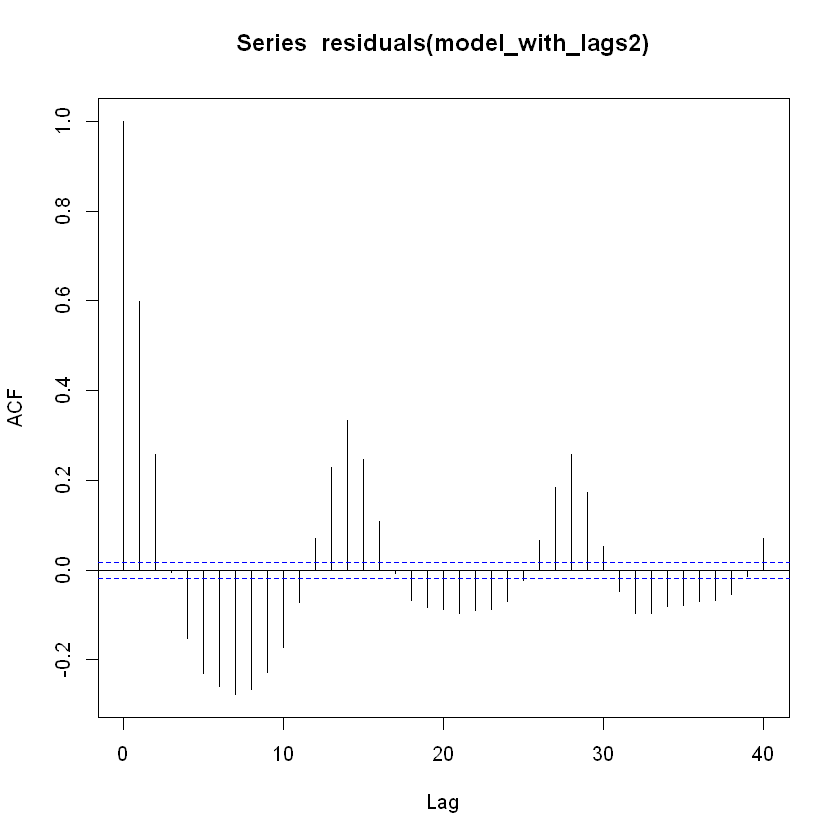

In [158]:
# Check residuals
checkresiduals(model_with_lags2)

# ACF of residuals
acf(residuals(model_with_lags2))

In [159]:
#Add Lagged Variables
final_data <- final_data %>%
  arrange(datetime) %>%
  mutate(
    lag1_production = lag(production, 48)
  ) %>%
  drop_na()  # Remove rows with NA values introduced by lagging

# Step 2: Fit the Linear Regression Model with Lagged Variables
model_with_lags <- lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
                      avg_TCDC_low_cloud_layer +avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
                      lag1_production+rolling_mean_production,
                      data = final_data)

# Step 3: Summary of the Model with Lags
summary(model_with_lags)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + rolling_mean_production, 
    data = final_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0380 -1.1283  0.1049  1.1832  7.2682 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.493e+01  8.950e-01 -27.849  < 2e-16 ***
hourhour06                5.931e-01  8.525e-02   6.957 3.65e-12 ***
hourhour07                2.593e+00  8.756e-02  29.616  < 2e-16 ***
hourhour08                4.886e+00  9.508e-02  51.390  < 2e-16 ***
hourhour09                6.242e+00  1.048e-01  59.580  < 2e-16 ***
hourhour10                6.352e+00  1.181e-01  53.767  < 2e-16 ***
hourhour11                6.097e+00  1.245e-01  48.972  < 2e-16 ***
hourhour12                5.884e+00  1.279e-01  46.001  < 2e-16 ***
hourhour13                5.4

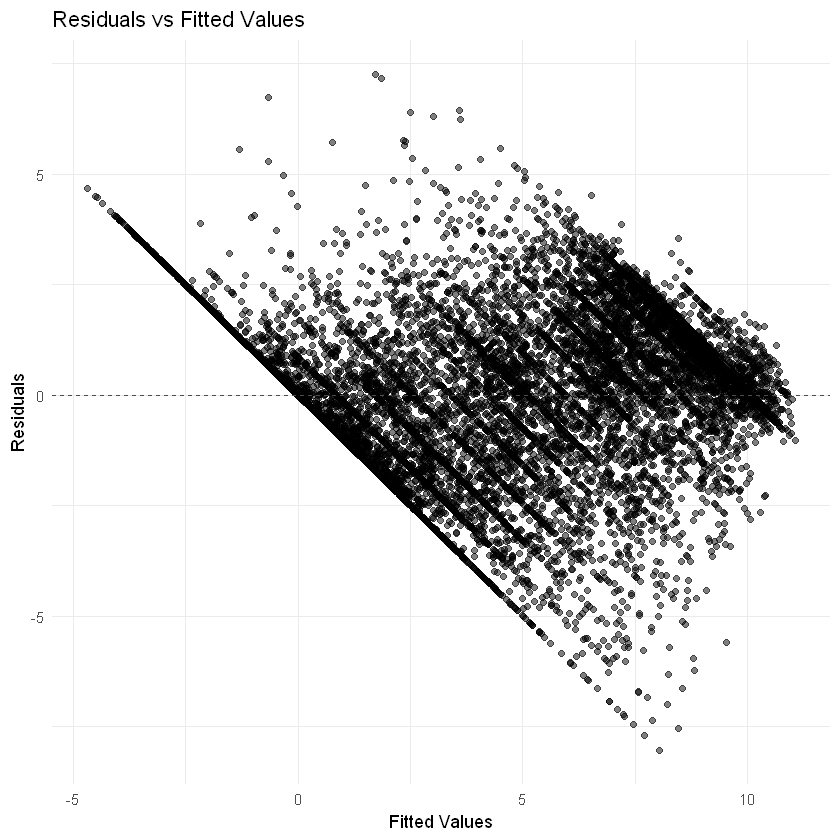

In [160]:
# Extract residuals and fitted values
residuals <- residuals(model_with_lags)
fitted_values <- fitted.values(model_with_lags)

# Create a data frame with these values
residuals_data <- data.frame(Fitted = fitted_values, Residuals = residuals)

# Plot residuals vs fitted values using ggplot2
ggplot(residuals_data, aes(x = Fitted, y = Residuals)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal()


	Breusch-Godfrey test for serial correlation of order up to 27

data:  Residuals
LM test = 5636.9, df = 27, p-value < 2.2e-16


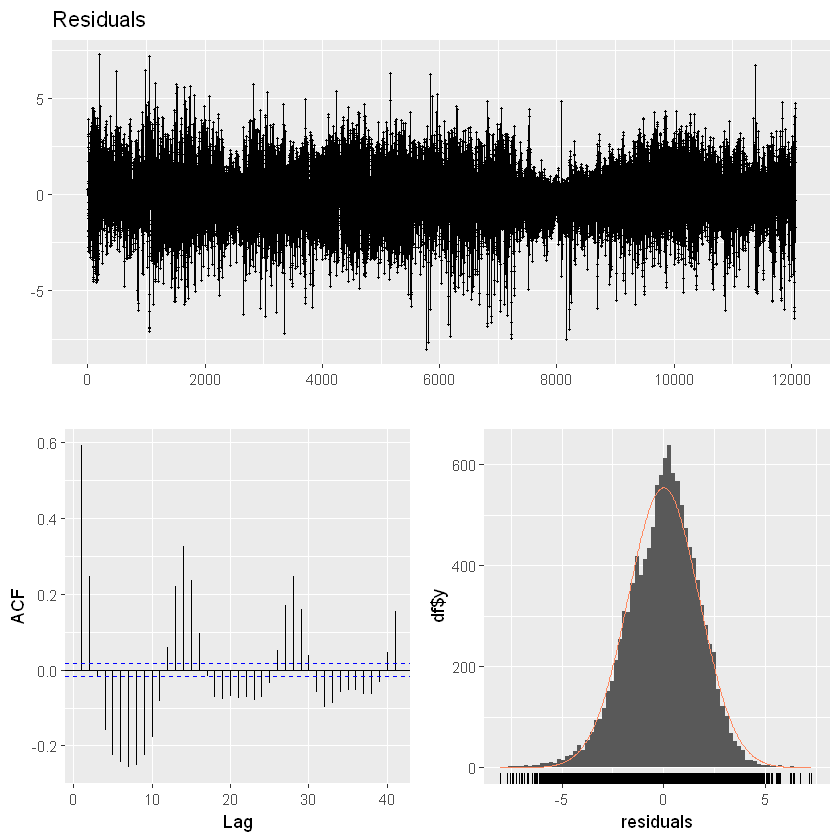

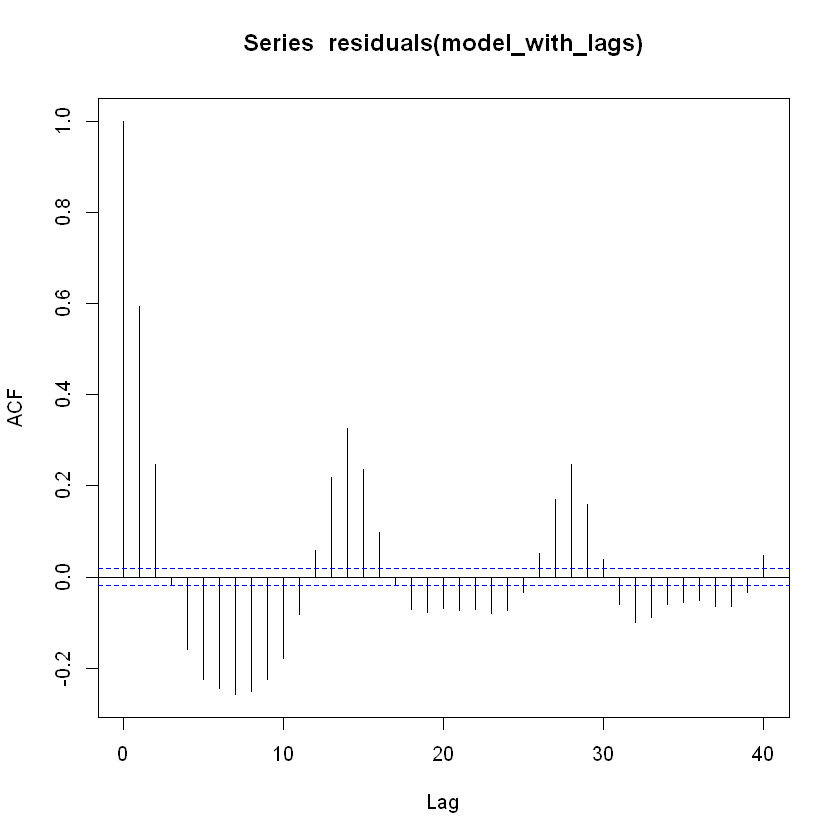

In [161]:
# Check residuals
checkresiduals(model_with_lags)

# ACF of residuals
acf(residuals(model_with_lags))

In [162]:
model0 <- lm(production ~ hour + season+ avg_TMP_surface + avg_USWRF_surface + 
            avg_TCDC_low_cloud_layer +avg_DLWRF_surface + avg_CSNOW_surface + rolling_mean_production, 
            data = final_data)

# Summary of the model
summary(model0)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    rolling_mean_production, data = final_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6898 -1.0758  0.1179  1.2172  8.4802 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -3.103e+01  9.085e-01 -34.160  < 2e-16 ***
hourhour06                5.066e-01  8.787e-02   5.765 8.36e-09 ***
hourhour07                2.481e+00  8.805e-02  28.177  < 2e-16 ***
hourhour08                4.738e+00  8.984e-02  52.741  < 2e-16 ***
hourhour09                6.120e+00  9.526e-02  64.240  < 2e-16 ***
hourhour10                6.061e+00  1.068e-01  56.733  < 2e-16 ***
hourhour11                5.864e+00  1.150e-01  51.004  < 2e-16 ***
hourhour12                5.617e+00  1.209e-01  46.451  < 2e-16 ***
hourhour13                5.168e+00  1.233e-01  41.899  < 2e-16 ***
hou

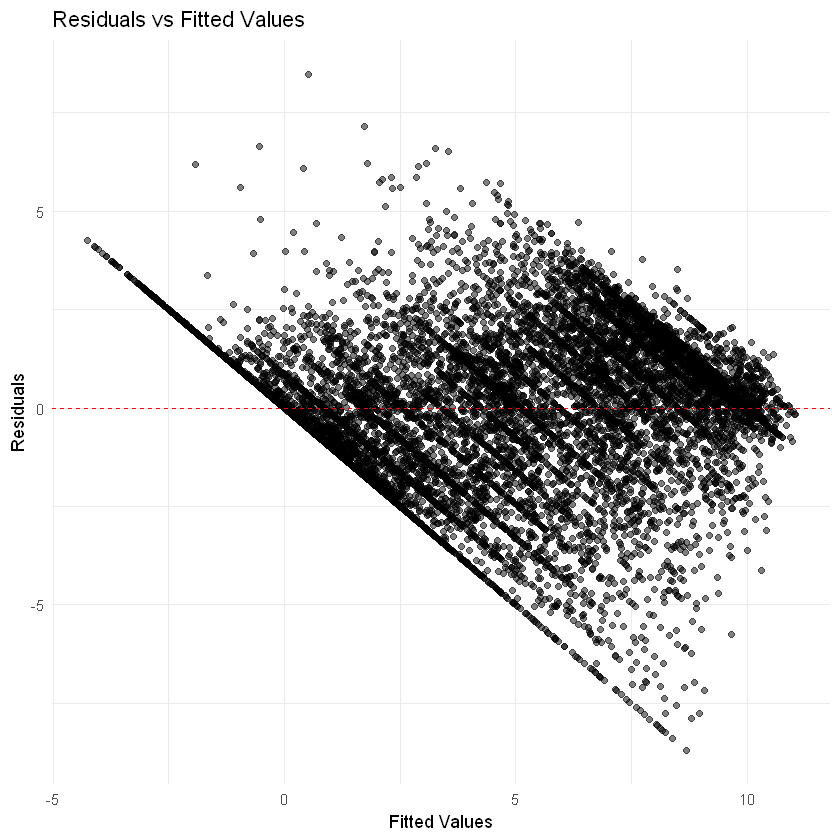

In [163]:
# Extract residuals and fitted values
residuals <- residuals(model0)
fitted_values <- fitted.values(model0)

# Create a data frame with these values
residuals_data <- data.frame(Fitted = fitted_values, Residuals = residuals)

# Plot residuals vs fitted values using ggplot2
ggplot(residuals_data, aes(x = Fitted, y = Residuals)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal()


	Breusch-Godfrey test for serial correlation of order up to 24

data:  Residuals
LM test = 5547, df = 24, p-value < 2.2e-16


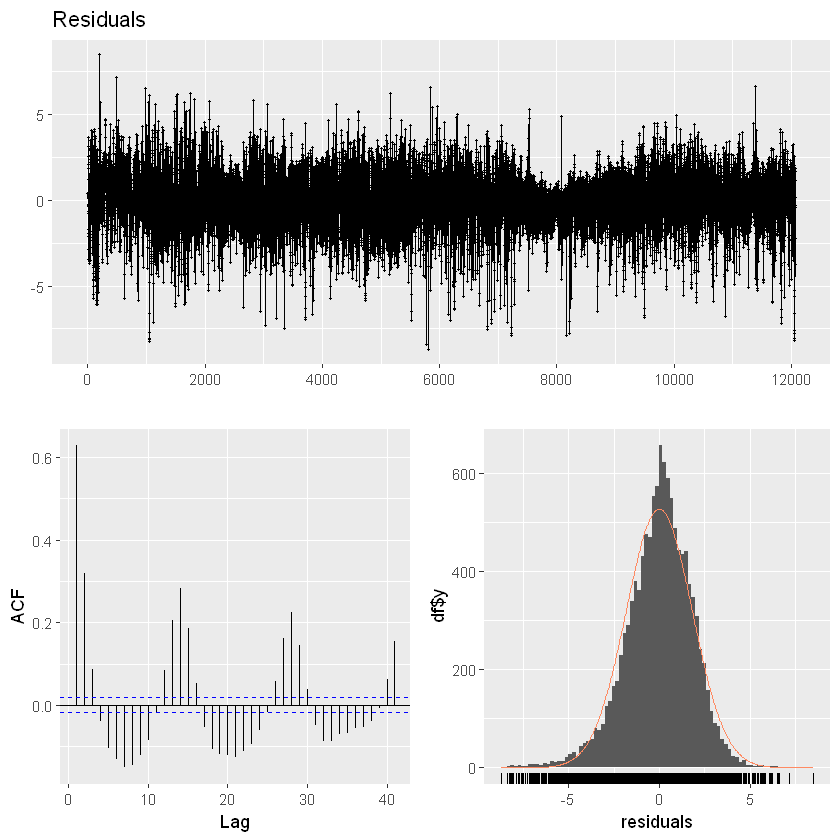

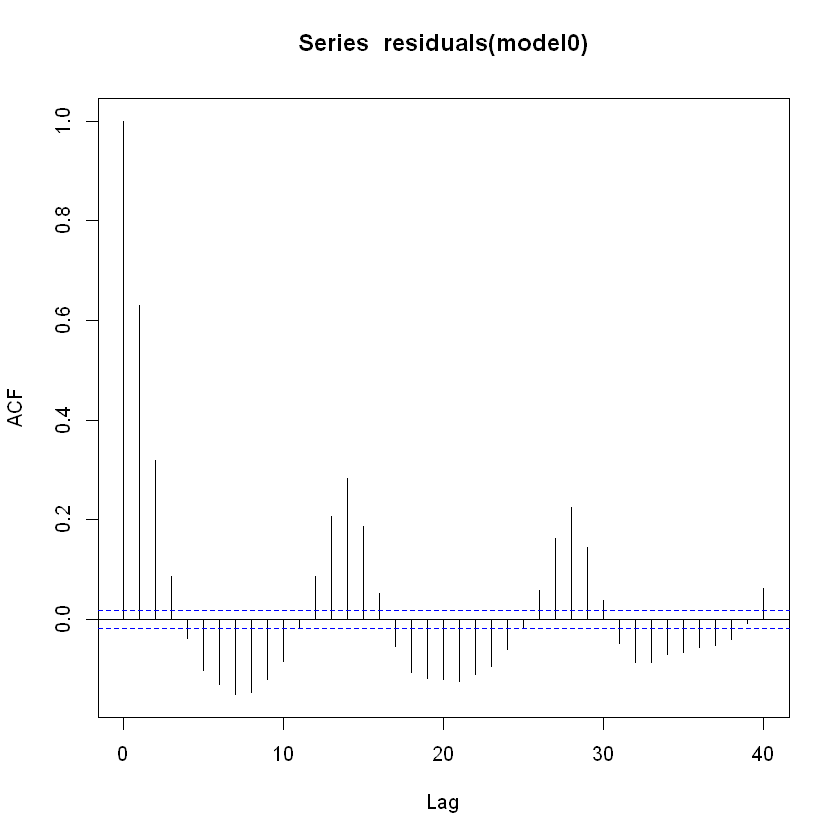

In [164]:
# Check residuals
checkresiduals(model0)

# ACF of residuals
acf(residuals(model0))

We will be using the last model_with_lags since it gave the best results even though the results of the models we've built do not differ much from each other.

In [165]:
# Load necessary libraries
library(dplyr)
library(lubridate)
library(forecast)
library(zoo)

# Ensure 'final_data' is ordered by datetime
final_data <- final_data %>% arrange(datetime)
# Define the levels for hour and season
season_levels <- c("Winter", "Spring", "Summer", "Fall")


# Extract month and create season variable
final_data$month <- factor(month(final_data$datetime, label = TRUE))
final_data$season <- factor(ifelse(final_data$month %in% c("Dec", "Jan", "Feb"), "Winter",
                                   ifelse(final_data$month %in% c("Mar", "Apr", "May"), "Spring",
                                          ifelse(final_data$month %in% c("Jun", "Jul", "Aug"), "Summer", "Fall"))),
                            levels = season_levels)


In [166]:
# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-11")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-15")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  
  
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
       lag1_production + rolling_mean_production, 
     data = data)
}

# Fit the model on the initial training data
initial_model <- define_model(train_data)
summary(initial_model)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + rolling_mean_production, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0658 -1.1194  0.0991  1.1771  7.2846 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.509e+01  8.990e-01 -27.909  < 2e-16 ***
hourhour06                5.714e-01  8.577e-02   6.661 2.83e-11 ***
hourhour07                2.569e+00  8.811e-02  29.160  < 2e-16 ***
hourhour08                4.876e+00  9.572e-02  50.946  < 2e-16 ***
hourhour09                6.250e+00  1.054e-01  59.273  < 2e-16 ***
hourhour10                6.362e+00  1.190e-01  53.479  < 2e-16 ***
hourhour11                6.110e+00  1.254e-01  48.716  < 2e-16 ***
hourhour12                5.891e+00  1.290e-01  45.685  < 2e-16 ***
hourhour13                5.442e+00

In [167]:
# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  predictions <- predict(model, newdata = prediction_data)
  results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
  
  return(results)
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-13 00:00:00"
prediction_end_date <- "2024-05-13 23:00:00"

# Get predictions for the specified dates
predictions13 <- make_predictions(prediction_start_date, prediction_end_date)
print(predictions13)

              datetime prediction
1  2024-05-13 05:00:00 -1.2940722
2  2024-05-13 06:00:00 -0.5789163
3  2024-05-13 07:00:00  1.7075526
4  2024-05-13 08:00:00  4.4466790
5  2024-05-13 09:00:00  6.3388907
6  2024-05-13 10:00:00  6.9236029
7  2024-05-13 11:00:00  7.2360350
8  2024-05-13 12:00:00  7.3868339
9  2024-05-13 13:00:00  7.0995402
10 2024-05-13 14:00:00  6.0020499
11 2024-05-13 15:00:00  4.1882703
12 2024-05-13 16:00:00  2.3560008
13 2024-05-13 17:00:00  1.0942000
14 2024-05-13 18:00:00  0.6411082


In [168]:
# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-12")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-15")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  
  
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
       lag1_production + rolling_mean_production, 
     data = data)
}

# Fit the model on the initial training data
initial_model <- define_model(train_data)
summary(initial_model)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + rolling_mean_production, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0619 -1.1206  0.1008  1.1795  7.2798 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.511e+01  8.991e-01 -27.927  < 2e-16 ***
hourhour06                5.741e-01  8.577e-02   6.693 2.28e-11 ***
hourhour07                2.573e+00  8.811e-02  29.200  < 2e-16 ***
hourhour08                4.880e+00  9.572e-02  50.987  < 2e-16 ***
hourhour09                6.251e+00  1.055e-01  59.269  < 2e-16 ***
hourhour10                6.363e+00  1.190e-01  53.468  < 2e-16 ***
hourhour11                6.105e+00  1.255e-01  48.663  < 2e-16 ***
hourhour12                5.883e+00  1.290e-01  45.617  < 2e-16 ***
hourhour13                5.435e+00

In [169]:
# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  predictions <- predict(model, newdata = prediction_data)
  results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
  
  return(results)
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-14 00:00:00"
prediction_end_date <- "2024-05-14 23:00:00"

# Get predictions for the specified dates
predictions14 <- make_predictions(prediction_start_date, prediction_end_date)
print(predictions14)

              datetime prediction
1  2024-05-14 05:00:00  0.5549498
2  2024-05-14 06:00:00  1.1709117
3  2024-05-14 07:00:00  3.4238865
4  2024-05-14 08:00:00  5.9018761
5  2024-05-14 09:00:00  7.8347005
6  2024-05-14 10:00:00  8.9443695
7  2024-05-14 11:00:00  9.1626792
8  2024-05-14 12:00:00  9.3284231
9  2024-05-14 13:00:00  9.2042536
10 2024-05-14 14:00:00  8.2269106
11 2024-05-14 15:00:00  6.5930176
12 2024-05-14 16:00:00  4.5287022
13 2024-05-14 17:00:00  2.8485375
14 2024-05-14 18:00:00  2.0121670


In [170]:
# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-13")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-13")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  
  
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
       lag1_production + rolling_mean_production, 
     data = data)
}

# Fit the model on the initial training data
initial_model <- define_model(train_data)
summary(initial_model)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + rolling_mean_production, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0434 -1.1255  0.1007  1.1796  7.2600 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.497e+01  8.993e-01 -27.768  < 2e-16 ***
hourhour06                5.754e-01  8.586e-02   6.702 2.15e-11 ***
hourhour07                2.571e+00  8.820e-02  29.151  < 2e-16 ***
hourhour08                4.878e+00  9.583e-02  50.900  < 2e-16 ***
hourhour09                6.246e+00  1.056e-01  59.151  < 2e-16 ***
hourhour10                6.363e+00  1.191e-01  53.410  < 2e-16 ***
hourhour11                6.104e+00  1.256e-01  48.612  < 2e-16 ***
hourhour12                5.885e+00  1.291e-01  45.599  < 2e-16 ***
hourhour13                5.438e+00

In [171]:
# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  predictions <- predict(model, newdata = prediction_data)
  results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
  
  return(results)
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-15 00:00:00"
prediction_end_date <- "2024-05-15 23:00:00"

# Get predictions for the specified dates
predictions15 <- make_predictions(prediction_start_date, prediction_end_date)
print(predictions15)

              datetime prediction
1  2024-05-15 05:00:00  0.9810980
2  2024-05-15 06:00:00  1.6441724
3  2024-05-15 07:00:00  3.9445981
4  2024-05-15 08:00:00  6.7230633
5  2024-05-15 09:00:00  8.5884649
6  2024-05-15 10:00:00  9.3834706
7  2024-05-15 11:00:00  9.6169007
8  2024-05-15 12:00:00  9.4840812
9  2024-05-15 13:00:00  8.8593969
10 2024-05-15 14:00:00  7.6441604
11 2024-05-15 15:00:00  5.7076919
12 2024-05-15 16:00:00  3.2070580
13 2024-05-15 17:00:00  1.7123546
14 2024-05-15 18:00:00  0.8356531


In [172]:
# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-14")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-15")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  
  
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
       lag1_production + rolling_mean_production, 
     data = data)
}

# Fit the model on the initial training data
initial_model <- define_model(train_data)
summary(initial_model)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + rolling_mean_production, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0508 -1.1258  0.1014  1.1783  7.2595 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.503e+01  8.995e-01 -27.829  < 2e-16 ***
hourhour06                5.763e-01  8.585e-02   6.713 1.99e-11 ***
hourhour07                2.571e+00  8.819e-02  29.157  < 2e-16 ***
hourhour08                4.878e+00  9.581e-02  50.912  < 2e-16 ***
hourhour09                6.242e+00  1.056e-01  59.135  < 2e-16 ***
hourhour10                6.356e+00  1.191e-01  53.377  < 2e-16 ***
hourhour11                6.098e+00  1.255e-01  48.586  < 2e-16 ***
hourhour12                5.875e+00  1.290e-01  45.549  < 2e-16 ***
hourhour13                5.428e+00

In [173]:
# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  predictions <- predict(model, newdata = prediction_data)
  results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
  
  return(results)
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-16 00:00:00"
prediction_end_date <- "2024-05-16 23:00:00"

# Get predictions for the specified dates
predictions16 <- make_predictions(prediction_start_date, prediction_end_date)
print(predictions16)

              datetime prediction
1  2024-05-16 05:00:00  0.7576591
2  2024-05-16 06:00:00  1.3189843
3  2024-05-16 07:00:00  3.6832246
4  2024-05-16 08:00:00  6.4398436
5  2024-05-16 09:00:00  8.4304055
6  2024-05-16 10:00:00  8.7425962
7  2024-05-16 11:00:00  8.7250276
8  2024-05-16 12:00:00  8.0632072
9  2024-05-16 13:00:00  7.4104151
10 2024-05-16 14:00:00  6.2872040
11 2024-05-16 15:00:00  4.5467893
12 2024-05-16 16:00:00  2.2309155
13 2024-05-16 17:00:00  0.8825802
14 2024-05-16 18:00:00  0.2431128


In [174]:
# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-15")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-15")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  
  
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
       lag1_production + rolling_mean_production, 
     data = data)
}

# Fit the model on the initial training data
initial_model <- define_model(train_data)
summary(initial_model)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + rolling_mean_production, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0460 -1.1287  0.1027  1.1808  7.2608 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.502e+01  8.991e-01 -27.830  < 2e-16 ***
hourhour06                5.782e-01  8.579e-02   6.740 1.66e-11 ***
hourhour07                2.573e+00  8.813e-02  29.193  < 2e-16 ***
hourhour08                4.882e+00  9.574e-02  50.990  < 2e-16 ***
hourhour09                6.246e+00  1.055e-01  59.214  < 2e-16 ***
hourhour10                6.357e+00  1.190e-01  53.427  < 2e-16 ***
hourhour11                6.097e+00  1.254e-01  48.612  < 2e-16 ***
hourhour12                5.877e+00  1.289e-01  45.592  < 2e-16 ***
hourhour13                5.431e+00

In [175]:
# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  predictions <- predict(model, newdata = prediction_data)
  results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
  
  return(results)
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-17 00:00:00"
prediction_end_date <- "2024-05-17 23:00:00"

# Get predictions for the specified dates
predictions17 <- make_predictions(prediction_start_date, prediction_end_date)
print(predictions17)

              datetime prediction
1  2024-05-17 05:00:00  0.2771353
2  2024-05-17 06:00:00  0.9067367
3  2024-05-17 07:00:00  3.2324029
4  2024-05-17 08:00:00  5.7371970
5  2024-05-17 09:00:00  7.2742681
6  2024-05-17 10:00:00  7.1899881
7  2024-05-17 11:00:00  7.4628399
8  2024-05-17 12:00:00  7.4497083
9  2024-05-17 13:00:00  7.1239131
10 2024-05-17 14:00:00  6.0391246
11 2024-05-17 15:00:00  4.2773862
12 2024-05-17 16:00:00  2.3988702
13 2024-05-17 17:00:00  0.9755776
14 2024-05-17 18:00:00  0.6262769


In [176]:
# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-16")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-15")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  
  
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
       lag1_production + rolling_mean_production, 
     data = data)
}

# Fit the model on the initial training data
initial_model <- define_model(train_data)
summary(initial_model)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + rolling_mean_production, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0440 -1.1290  0.1036  1.1791  7.2656 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.498e+01  8.987e-01 -27.791  < 2e-16 ***
hourhour06                5.813e-01  8.573e-02   6.781 1.25e-11 ***
hourhour07                2.579e+00  8.806e-02  29.287  < 2e-16 ***
hourhour08                4.891e+00  9.563e-02  51.145  < 2e-16 ***
hourhour09                6.256e+00  1.054e-01  59.381  < 2e-16 ***
hourhour10                6.368e+00  1.189e-01  53.577  < 2e-16 ***
hourhour11                6.108e+00  1.253e-01  48.742  < 2e-16 ***
hourhour12                5.886e+00  1.288e-01  45.698  < 2e-16 ***
hourhour13                5.437e+00

In [177]:
# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  predictions <- predict(model, newdata = prediction_data)
  results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
  
  return(results)
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-18 00:00:00"
prediction_end_date <- "2024-05-18 23:00:00"

# Get predictions for the specified dates
predictions18 <- make_predictions(prediction_start_date, prediction_end_date)
print(predictions18)

              datetime prediction
1  2024-05-18 05:00:00  0.8494854
2  2024-05-18 06:00:00  1.4878945
3  2024-05-18 07:00:00  4.0866589
4  2024-05-18 08:00:00  6.9081613
5  2024-05-18 09:00:00  8.7372950
6  2024-05-18 10:00:00  9.2864238
7  2024-05-18 11:00:00  9.3262400
8  2024-05-18 12:00:00  9.2068691
9  2024-05-18 13:00:00  8.8211235
10 2024-05-18 14:00:00  7.8566686
11 2024-05-18 15:00:00  6.0855994
12 2024-05-18 16:00:00  3.9798697
13 2024-05-18 17:00:00  2.4281537
14 2024-05-18 18:00:00  1.6207840


In [178]:
# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-17")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-15")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  
  
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
       lag1_production + rolling_mean_production, 
     data = data)
}

# Fit the model on the initial training data
initial_model <- define_model(train_data)
summary(initial_model)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + rolling_mean_production, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0403 -1.1283  0.1042  1.1816  7.2641 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.495e+01  8.989e-01 -27.751  < 2e-16 ***
hourhour06                5.823e-01  8.573e-02   6.792 1.16e-11 ***
hourhour07                2.582e+00  8.805e-02  29.330  < 2e-16 ***
hourhour08                4.893e+00  9.560e-02  51.184  < 2e-16 ***
hourhour09                6.257e+00  1.053e-01  59.423  < 2e-16 ***
hourhour10                6.363e+00  1.188e-01  53.558  < 2e-16 ***
hourhour11                6.107e+00  1.253e-01  48.756  < 2e-16 ***
hourhour12                5.886e+00  1.287e-01  45.723  < 2e-16 ***
hourhour13                5.444e+00

In [179]:
# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  predictions <- predict(model, newdata = prediction_data)
  results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
  
  return(results)
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-19 00:00:00"
prediction_end_date <- "2024-05-19 23:00:00"

# Get predictions for the specified dates
predictions19 <- make_predictions(prediction_start_date, prediction_end_date)
print(predictions19)

              datetime prediction
1  2024-05-19 05:00:00  1.2486439
2  2024-05-19 06:00:00  1.8859736
3  2024-05-19 07:00:00  4.2727443
4  2024-05-19 08:00:00  6.9822988
5  2024-05-19 09:00:00  8.6441612
6  2024-05-19 10:00:00  9.0326121
7  2024-05-19 11:00:00  9.0880939
8  2024-05-19 12:00:00  8.9543373
9  2024-05-19 13:00:00  8.3751071
10 2024-05-19 14:00:00  7.1948466
11 2024-05-19 15:00:00  5.4059720
12 2024-05-19 16:00:00  2.8206431
13 2024-05-19 17:00:00  1.3210383
14 2024-05-19 18:00:00  0.4146523


In [180]:
# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-18")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-15")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  
  
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
       lag1_production + rolling_mean_production, 
     data = data)
}

# Fit the model on the initial training data
initial_model <- define_model(train_data)
summary(initial_model)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + rolling_mean_production, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0386 -1.1279  0.1049  1.1808  7.2609 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.493e+01  8.980e-01 -27.767  < 2e-16 ***
hourhour06                5.834e-01  8.566e-02   6.811 1.02e-11 ***
hourhour07                2.583e+00  8.797e-02  29.363  < 2e-16 ***
hourhour08                4.892e+00  9.551e-02  51.221  < 2e-16 ***
hourhour09                6.259e+00  1.052e-01  59.508  < 2e-16 ***
hourhour10                6.365e+00  1.187e-01  53.640  < 2e-16 ***
hourhour11                6.104e+00  1.251e-01  48.806  < 2e-16 ***
hourhour12                5.886e+00  1.285e-01  45.789  < 2e-16 ***
hourhour13                5.446e+00

In [181]:
# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  predictions <- predict(model, newdata = prediction_data)
  results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
  
  return(results)
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-20 00:00:00"
prediction_end_date <- "2024-05-20 23:00:00"

# Get predictions for the specified dates
predictions20 <- make_predictions(prediction_start_date, prediction_end_date)
print(predictions20)

              datetime prediction
1  2024-05-20 05:00:00  0.3286802
2  2024-05-20 06:00:00  0.9174189
3  2024-05-20 07:00:00  3.2557505
4  2024-05-20 08:00:00  5.7618826
5  2024-05-20 09:00:00  7.3833991
6  2024-05-20 10:00:00  7.9163611
7  2024-05-20 11:00:00  7.8909668
8  2024-05-20 12:00:00  7.7072267
9  2024-05-20 13:00:00  7.1640359
10 2024-05-20 14:00:00  5.7746336
11 2024-05-20 15:00:00  3.7902205
12 2024-05-20 16:00:00  1.5668229
13 2024-05-20 17:00:00  0.0894464
14 2024-05-20 18:00:00 -0.3503375


In [182]:
# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-19")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-15")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  
  
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
       lag1_production + rolling_mean_production, 
     data = data)
}

# Fit the model on the initial training data
initial_model <- define_model(train_data)
summary(initial_model)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + rolling_mean_production, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-8.042 -1.126  0.106  1.181  7.264 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.490e+01  8.972e-01 -27.748  < 2e-16 ***
hourhour06                5.855e-01  8.558e-02   6.842 8.18e-12 ***
hourhour07                2.586e+00  8.789e-02  29.423  < 2e-16 ***
hourhour08                4.896e+00  9.542e-02  51.312  < 2e-16 ***
hourhour09                6.264e+00  1.051e-01  59.599  < 2e-16 ***
hourhour10                6.370e+00  1.186e-01  53.726  < 2e-16 ***
hourhour11                6.110e+00  1.250e-01  48.889  < 2e-16 ***
hourhour12                5.892e+00  1.284e-01  45.877  < 2e-16 ***
hourhour13                5.452e+00  1.249e-0

In [183]:
# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  predictions <- predict(model, newdata = prediction_data)
  results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
  
  return(results)
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-21 00:00:00"
prediction_end_date <- "2024-05-21 23:00:00"

# Get predictions for the specified dates
predictions21 <- make_predictions(prediction_start_date, prediction_end_date)
print(predictions21)

              datetime   prediction
1  2024-05-21 05:00:00 -0.006202228
2  2024-05-21 06:00:00  0.647279311
3  2024-05-21 07:00:00  3.191317313
4  2024-05-21 08:00:00  6.036532338
5  2024-05-21 09:00:00  7.947580824
6  2024-05-21 10:00:00  8.401629887
7  2024-05-21 11:00:00  8.615030516
8  2024-05-21 12:00:00  8.453403073
9  2024-05-21 13:00:00  7.862785827
10 2024-05-21 14:00:00  6.562410584
11 2024-05-21 15:00:00  4.571380759
12 2024-05-21 16:00:00  2.232970392
13 2024-05-21 17:00:00  0.981017714
14 2024-05-21 18:00:00  0.450305413


In [184]:
# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-20")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-15")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  
  
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
       lag1_production + rolling_mean_production, 
     data = data)
}

# Fit the model on the initial training data
initial_model <- define_model(train_data)
summary(initial_model)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + rolling_mean_production, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0440 -1.1220  0.1049  1.1819  7.2650 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.490e+01  8.967e-01 -27.767  < 2e-16 ***
hourhour06                5.875e-01  8.550e-02   6.871 6.67e-12 ***
hourhour07                2.589e+00  8.781e-02  29.488  < 2e-16 ***
hourhour08                4.899e+00  9.534e-02  51.390  < 2e-16 ***
hourhour09                6.265e+00  1.050e-01  59.655  < 2e-16 ***
hourhour10                6.370e+00  1.185e-01  53.770  < 2e-16 ***
hourhour11                6.112e+00  1.249e-01  48.941  < 2e-16 ***
hourhour12                5.893e+00  1.283e-01  45.913  < 2e-16 ***
hourhour13                5.454e+00

In [185]:
# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  predictions <- predict(model, newdata = prediction_data)
  results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
  
  return(results)
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-22 00:00:00"
prediction_end_date <- "2024-05-22 23:00:00"

# Get predictions for the specified dates
predictions22 <- make_predictions(prediction_start_date, prediction_end_date)
print(predictions22)

              datetime prediction
1  2024-05-22 05:00:00  0.8173769
2  2024-05-22 06:00:00  1.5736898
3  2024-05-22 07:00:00  4.1354635
4  2024-05-22 08:00:00  6.9739696
5  2024-05-22 09:00:00  8.8993231
6  2024-05-22 10:00:00  9.4682118
7  2024-05-22 11:00:00  9.5064649
8  2024-05-22 12:00:00  9.3943862
9  2024-05-22 13:00:00  9.0517524
10 2024-05-22 14:00:00  8.1492777
11 2024-05-22 15:00:00  6.4922991
12 2024-05-22 16:00:00  4.4130163
13 2024-05-22 17:00:00  2.8621492
14 2024-05-22 18:00:00  1.9163610


In [186]:
# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-21")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-15")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  
  
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
       lag1_production + rolling_mean_production, 
     data = data)
}

# Fit the model on the initial training data
initial_model <- define_model(train_data)
summary(initial_model)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + rolling_mean_production, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0442 -1.1220  0.1051  1.1813  7.2619 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.489e+01  8.962e-01 -27.774  < 2e-16 ***
hourhour06                5.878e-01  8.541e-02   6.882 6.19e-12 ***
hourhour07                2.588e+00  8.773e-02  29.502  < 2e-16 ***
hourhour08                4.897e+00  9.526e-02  51.408  < 2e-16 ***
hourhour09                6.264e+00  1.049e-01  59.696  < 2e-16 ***
hourhour10                6.371e+00  1.184e-01  53.818  < 2e-16 ***
hourhour11                6.112e+00  1.248e-01  48.983  < 2e-16 ***
hourhour12                5.891e+00  1.282e-01  45.933  < 2e-16 ***
hourhour13                5.455e+00

In [187]:
# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  predictions <- predict(model, newdata = prediction_data)
  results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
  
  return(results)
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-23 00:00:00"
prediction_end_date <- "2024-05-23 23:00:00"

# Get predictions for the specified dates
predictions23 <- make_predictions(prediction_start_date, prediction_end_date)
print(predictions23)

              datetime prediction
1  2024-05-23 05:00:00 1.28448315
2  2024-05-23 06:00:00 2.08857822
3  2024-05-23 07:00:00 4.57861322
4  2024-05-23 08:00:00 7.18686875
5  2024-05-23 09:00:00 9.04292456
6  2024-05-23 10:00:00 9.29619732
7  2024-05-23 11:00:00 9.18428637
8  2024-05-23 12:00:00 8.98578824
9  2024-05-23 13:00:00 8.34093472
10 2024-05-23 14:00:00 6.85768592
11 2024-05-23 15:00:00 4.88550909
12 2024-05-23 16:00:00 2.56890938
13 2024-05-23 17:00:00 0.92394667
14 2024-05-23 18:00:00 0.07278654


In [188]:
# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-22")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-15")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  
  
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
       lag1_production + rolling_mean_production, 
     data = data)
}

# Fit the model on the initial training data
initial_model <- define_model(train_data)
summary(initial_model)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + rolling_mean_production, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0410 -1.1212  0.1041  1.1819  7.2611 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.487e+01  8.961e-01 -27.751  < 2e-16 ***
hourhour06                5.884e-01  8.539e-02   6.891 5.83e-12 ***
hourhour07                2.591e+00  8.770e-02  29.537  < 2e-16 ***
hourhour08                4.899e+00  9.524e-02  51.432  < 2e-16 ***
hourhour09                6.264e+00  1.049e-01  59.703  < 2e-16 ***
hourhour10                6.368e+00  1.184e-01  53.797  < 2e-16 ***
hourhour11                6.110e+00  1.248e-01  48.972  < 2e-16 ***
hourhour12                5.886e+00  1.282e-01  45.916  < 2e-16 ***
hourhour13                5.457e+00

In [189]:
# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  predictions <- predict(model, newdata = prediction_data)
  results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
  
  return(results)
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-24 00:00:00"
prediction_end_date <- "2024-05-24 23:00:00"

# Get predictions for the specified dates
predictions24 <- make_predictions(prediction_start_date, prediction_end_date)
print(predictions24)

              datetime  prediction
1  2024-05-24 05:00:00 -0.01985107
2  2024-05-24 06:00:00  0.45010934
3  2024-05-24 07:00:00  2.54361879
4  2024-05-24 08:00:00  5.07861170
5  2024-05-24 09:00:00  6.77751889
6  2024-05-24 10:00:00  7.03267747
7  2024-05-24 11:00:00  6.77744528
8  2024-05-24 12:00:00  6.21945590
9  2024-05-24 13:00:00  5.38848029
10 2024-05-24 14:00:00  4.10703791
11 2024-05-24 15:00:00  2.27916892
12 2024-05-24 16:00:00  0.23477066
13 2024-05-24 17:00:00 -0.92496330
14 2024-05-24 18:00:00 -1.61665208


In [190]:
# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-23")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-15")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  
  
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
       lag1_production + rolling_mean_production, 
     data = data)
}

# Fit the model on the initial training data
initial_model <- define_model(train_data)
summary(initial_model)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + rolling_mean_production, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0438 -1.1219  0.1051  1.1816  7.2662 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.486e+01  8.957e-01 -27.751  < 2e-16 ***
hourhour06                5.903e-01  8.532e-02   6.919 4.78e-12 ***
hourhour07                2.593e+00  8.763e-02  29.593  < 2e-16 ***
hourhour08                4.902e+00  9.518e-02  51.503  < 2e-16 ***
hourhour09                6.266e+00  1.049e-01  59.764  < 2e-16 ***
hourhour10                6.371e+00  1.183e-01  53.851  < 2e-16 ***
hourhour11                6.113e+00  1.247e-01  49.026  < 2e-16 ***
hourhour12                5.891e+00  1.281e-01  45.974  < 2e-16 ***
hourhour13                5.462e+00

In [191]:
# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  predictions <- predict(model, newdata = prediction_data)
  results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
  
  return(results)
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-25 00:00:00"
prediction_end_date <- "2024-05-25 23:00:00"

# Get predictions for the specified dates
predictions25 <- make_predictions(prediction_start_date, prediction_end_date)
print(predictions25)

              datetime prediction
1  2024-05-25 05:00:00 -1.2219543
2  2024-05-25 06:00:00 -0.6031737
3  2024-05-25 07:00:00  1.5734761
4  2024-05-25 08:00:00  4.1001847
5  2024-05-25 09:00:00  5.6819520
6  2024-05-25 10:00:00  5.7076542
7  2024-05-25 11:00:00  5.5904761
8  2024-05-25 12:00:00  5.5767846
9  2024-05-25 13:00:00  5.3366701
10 2024-05-25 14:00:00  4.5325568
11 2024-05-25 15:00:00  3.0593107
12 2024-05-25 16:00:00  1.7853412
13 2024-05-25 17:00:00  0.3627033
14 2024-05-25 18:00:00 -0.1548287


In [192]:
# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-24")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-15")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  
  
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + trend + seasonal +
       lag1_production + rolling_mean_production, 
     data = data)
}

# Fit the model on the initial training data
initial_model <- define_model(train_data)
summary(initial_model)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface + 
    trend + seasonal + lag1_production + rolling_mean_production, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0449 -1.1196  0.1061  1.1810  7.2659 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.487e+01  8.951e-01 -27.779  < 2e-16 ***
hourhour06                5.917e-01  8.523e-02   6.943 4.03e-12 ***
hourhour07                2.595e+00  8.755e-02  29.643  < 2e-16 ***
hourhour08                4.904e+00  9.509e-02  51.569  < 2e-16 ***
hourhour09                6.267e+00  1.048e-01  59.812  < 2e-16 ***
hourhour10                6.371e+00  1.182e-01  53.889  < 2e-16 ***
hourhour11                6.112e+00  1.246e-01  49.055  < 2e-16 ***
hourhour12                5.890e+00  1.280e-01  46.002  < 2e-16 ***
hourhour13                5.459e+00

In [193]:
# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  predictions <- predict(model, newdata = prediction_data)
  results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
  
  return(results)
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-26 00:00:00"
prediction_end_date <- "2024-05-26 23:00:00"

# Get predictions for the specified dates
predictions26 <- make_predictions(prediction_start_date, prediction_end_date)
print(predictions26)

              datetime prediction
1  2024-05-26 05:00:00 0.01613403
2  2024-05-26 06:00:00 0.85189295
3  2024-05-26 07:00:00 3.47926790
4  2024-05-26 08:00:00 6.28087990
5  2024-05-26 09:00:00 8.23455243
6  2024-05-26 10:00:00 8.72099042
7  2024-05-26 11:00:00 8.71797504
8  2024-05-26 12:00:00 8.53263970
9  2024-05-26 13:00:00 8.13205486
10 2024-05-26 14:00:00 6.92416579
11 2024-05-26 15:00:00 5.00285601
12 2024-05-26 16:00:00 2.73744537
13 2024-05-26 17:00:00 1.06271947
14 2024-05-26 18:00:00 0.24153606


In [194]:
# Combine all the predictions into one data frame
all_predictions <- rbind(predictions13, predictions14, predictions15, predictions16,
                         predictions17, predictions18, predictions19, predictions20,
                         predictions21, predictions22, predictions23, predictions24,
                         predictions25, predictions26)

# Ensure the final_data dataframe contains the actual production values
# for the corresponding datetime
merged_results <- all_predictions %>%
  left_join(final_data %>% select(datetime, production), by = "datetime")

In [195]:
print(merged_results)

               datetime   prediction production
1   2024-05-13 05:00:00 -1.294072226       0.76
2   2024-05-13 06:00:00 -0.578916312       2.69
3   2024-05-13 07:00:00  1.707552604       5.75
4   2024-05-13 08:00:00  4.446678973       9.24
5   2024-05-13 09:00:00  6.338890660       8.88
6   2024-05-13 10:00:00  6.923602868       7.85
7   2024-05-13 11:00:00  7.236035023       8.36
8   2024-05-13 12:00:00  7.386833918       5.34
9   2024-05-13 13:00:00  7.099540170       4.04
10  2024-05-13 14:00:00  6.002049865       5.89
11  2024-05-13 15:00:00  4.188270314       5.32
12  2024-05-13 16:00:00  2.356000824       3.62
13  2024-05-13 17:00:00  1.094200014       1.30
14  2024-05-13 18:00:00  0.641108243       0.16
15  2024-05-14 05:00:00  0.554949796       0.96
16  2024-05-14 06:00:00  1.170911660       2.59
17  2024-05-14 07:00:00  3.423886523       4.14
18  2024-05-14 08:00:00  5.901876085       7.60
19  2024-05-14 09:00:00  7.834700478       8.83
20  2024-05-14 10:00:00  8.944369500    

In [196]:
# Set negative prediction values to 0 since there can not be negative production
merged_results$prediction <- ifelse(merged_results$prediction < 0, 0, merged_results$prediction)

print(merged_results)

               datetime prediction production
1   2024-05-13 05:00:00 0.00000000       0.76
2   2024-05-13 06:00:00 0.00000000       2.69
3   2024-05-13 07:00:00 1.70755260       5.75
4   2024-05-13 08:00:00 4.44667897       9.24
5   2024-05-13 09:00:00 6.33889066       8.88
6   2024-05-13 10:00:00 6.92360287       7.85
7   2024-05-13 11:00:00 7.23603502       8.36
8   2024-05-13 12:00:00 7.38683392       5.34
9   2024-05-13 13:00:00 7.09954017       4.04
10  2024-05-13 14:00:00 6.00204987       5.89
11  2024-05-13 15:00:00 4.18827031       5.32
12  2024-05-13 16:00:00 2.35600082       3.62
13  2024-05-13 17:00:00 1.09420001       1.30
14  2024-05-13 18:00:00 0.64110824       0.16
15  2024-05-14 05:00:00 0.55494980       0.96
16  2024-05-14 06:00:00 1.17091166       2.59
17  2024-05-14 07:00:00 3.42388652       4.14
18  2024-05-14 08:00:00 5.90187608       7.60
19  2024-05-14 09:00:00 7.83470048       8.83
20  2024-05-14 10:00:00 8.94436950       7.44
21  2024-05-14 11:00:00 9.16267921

In [197]:
# Calculate WMAPE
wmape <- sum(abs(merged_results$production - merged_results$prediction)) / sum(merged_results$production)

# Print WMAPE
print(paste("WMAPE:", round(wmape * 100, 2), "%"))

[1] "WMAPE: 24.29 %"


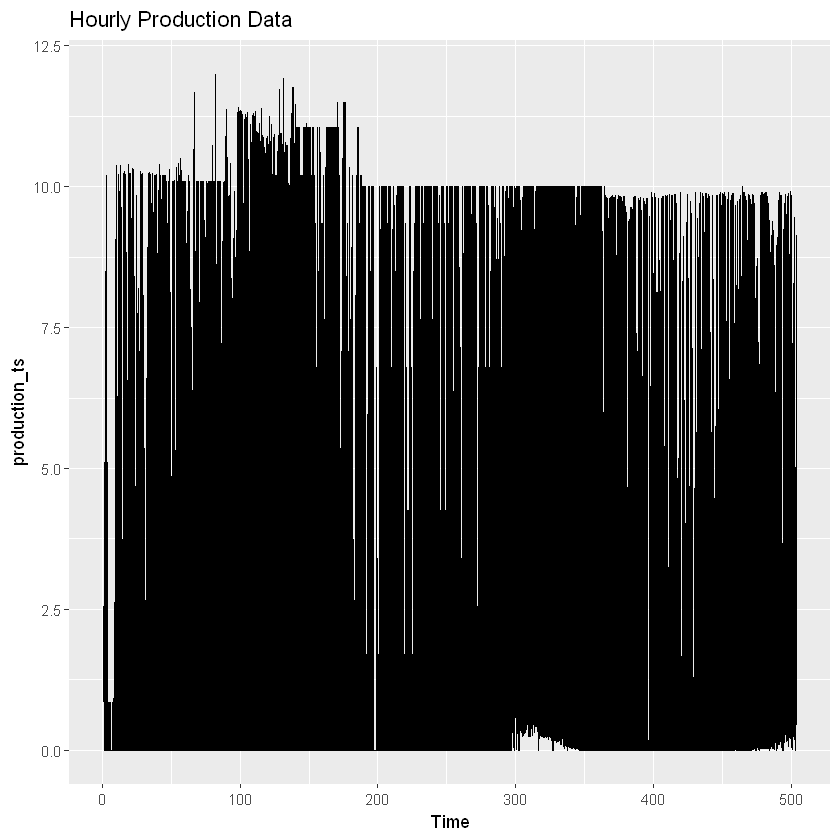

In [198]:
library(forecast)
library(tidyverse)
library(tseries)

# Convert your production data to a time series object
production_ts <- ts(final_data$production, frequency = 24) # Assuming hourly data

# Plot the data to visualize it
autoplot(production_ts) + ggtitle("Hourly Production Data")

Warning message in adf.test(production_ts):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  production_ts
Dickey-Fuller = -13.319, Lag order = 22, p-value = 0.01
alternative hypothesis: stationary



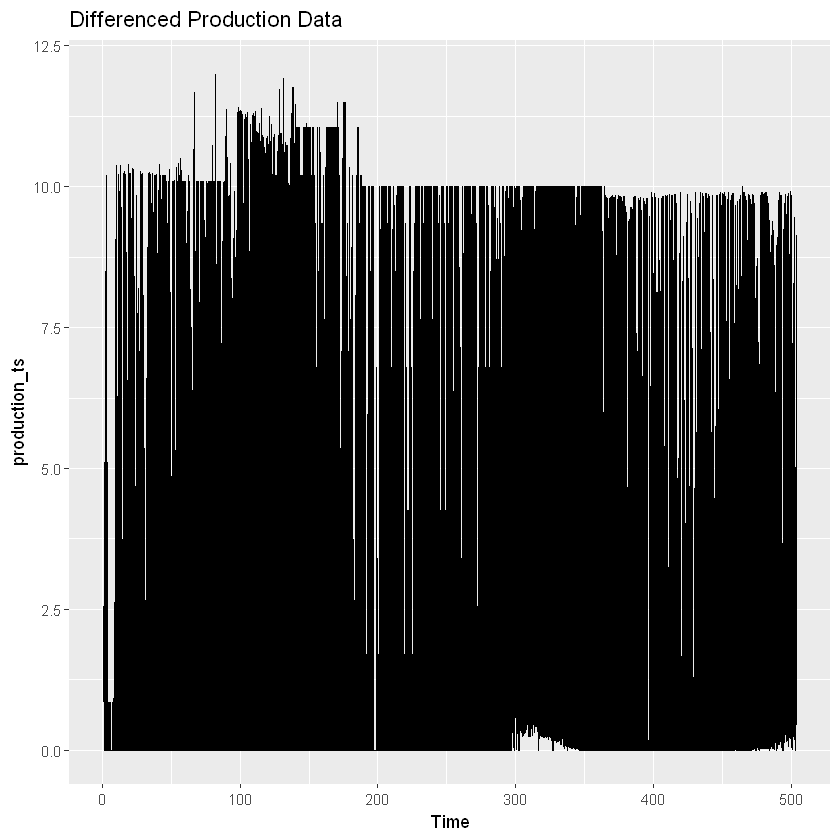

In [199]:
# Perform an Augmented Dickey-Fuller Test to check stationarity
adf_test <- adf.test(production_ts)
print(adf_test)

# If the p-value > 0.05, the series is not stationary, and we need to difference the data
if (adf_test$p.value > 0.05) {
  differenced_ts <- diff(production_ts)
  adf_test_diff <- adf.test(differenced_ts)
  print(adf_test_diff)
  production_ts <- differenced_ts
}

# Plot the differenced data
autoplot(production_ts) + ggtitle("Differenced Production Data")

- The test rejects the null hypothesis of non-stationarity, suggesting that our time series is stationary.
- Proceed to fit an ARIMA model.

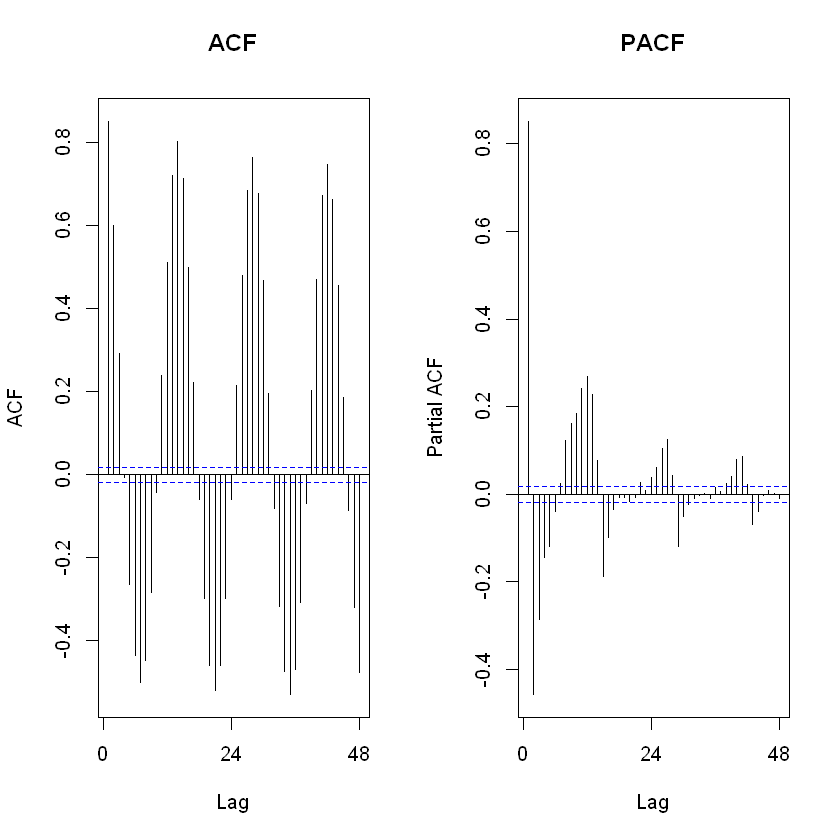

In [200]:
# Plot ACF and PACF
par(mfrow = c(1, 2))
Acf(production_ts, main='ACF')
Pacf(production_ts, main='PACF')

- Looking at the ACF and PACF plots, suggested to come up with a sarima_model <- Arima(ts_residuals, order = c(3, 0, 2), seasonal = list(order = c(4, 0, 4), period = 24)). However since it's running time is extraordinarily long, decided use a with a simpler model.


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0227 -0.9989  0.0891  1.2250  8.7582 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -4.129e+01  8.708e-01 -47.421  < 2e-16 ***
hourhour06                5.695e-01  9.135e-02   6.234 4.69e-10 ***
hourhour07                2.489e+00  9.156e-02  27.184  < 2e-16 ***
hourhour08                4.550e+00  9.316e-02  48.845  < 2e-16 ***
hourhour09                5.612e+00  9.727e-02  57.698  < 2e-16 ***
hourhour10                5.031e+00  1.048e-01  48.020  < 2e-16 ***
hourhour11                4.529e+00  1.096e-01  41.303  < 2e-16 ***
hourhour12                4.072e+00  1.132e-01  35.971  < 2e-16 ***
hourhour13                3.515e+00  1.146e-01  30.670  < 2e-16 ***
hourhour14                2.574e+00

Series: ts_residuals 
ARIMA(3,0,2)(1,0,1)[24] with non-zero mean 

Coefficients:
         ar1     ar2      ar3     ma1      ma2    sar1     sma1    mean
      0.1545  0.7324  -0.3948  0.5472  -0.4245  0.5097  -0.5343  0.0005
s.e.  0.0526  0.0219   0.0313  0.0552   0.0533  0.1034   0.1040  0.0276

sigma^2 = 2.044:  log likelihood = -20977.28
AIC=41972.57   AICc=41972.58   BIC=42038.96

Training set error measures:
                        ME     RMSE      MAE      MPE     MAPE      MASE
Training set -0.0002521003 1.429198 1.048401 796.0527 1072.506 0.4965697
                    ACF1
Training set 0.001556447


	Ljung-Box test

data:  Residuals from ARIMA(3,0,2)(1,0,1)[24] with non-zero mean
Q* = 1766.6, df = 41, p-value < 2.2e-16

Model df: 7.   Total lags used: 48



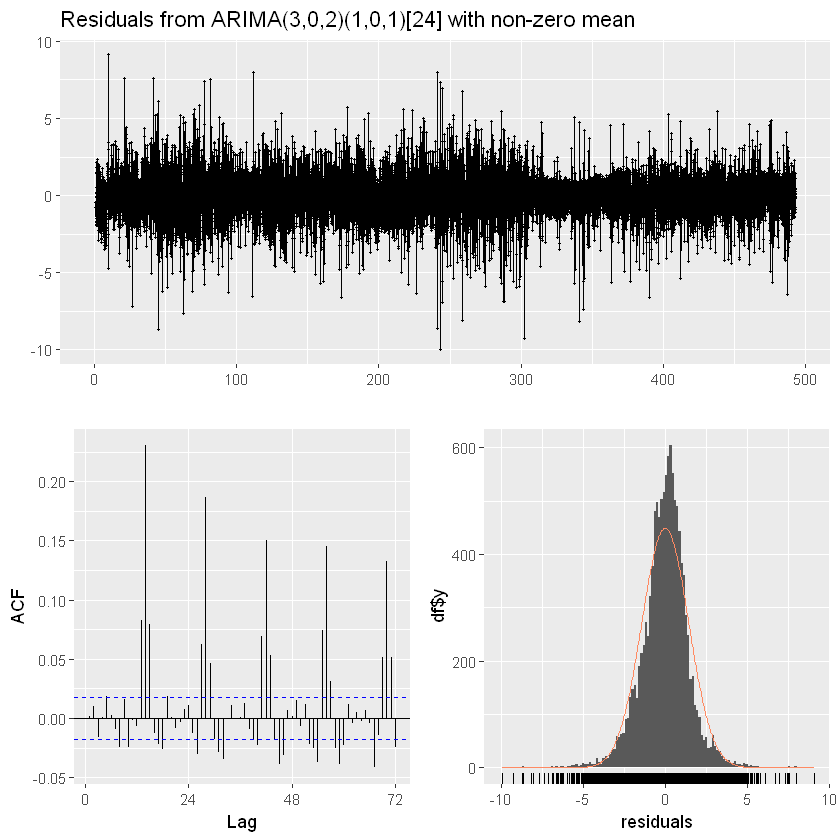

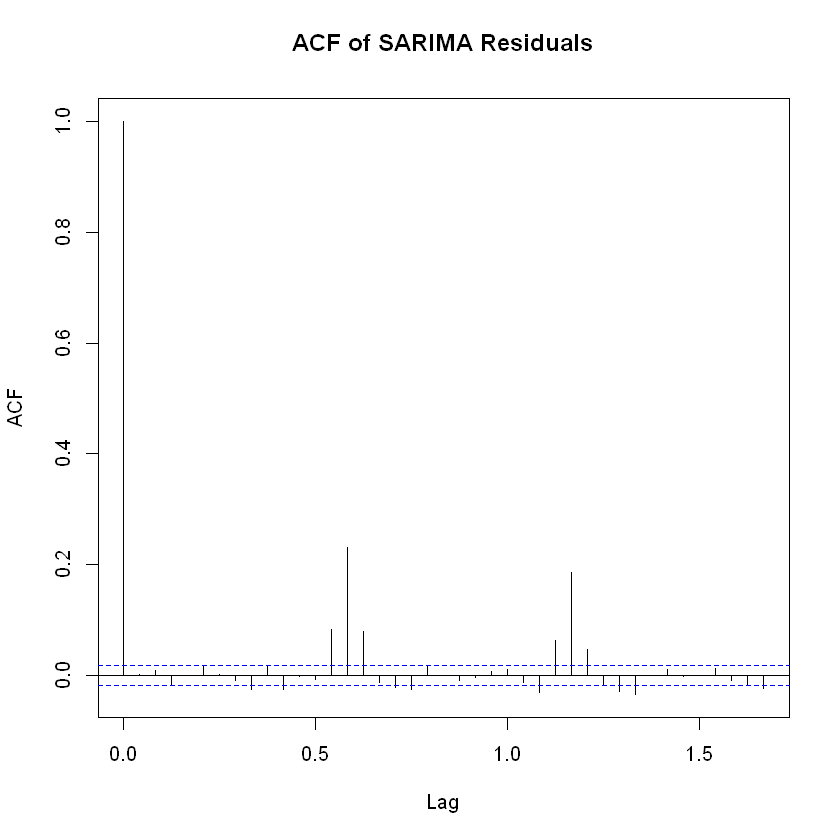

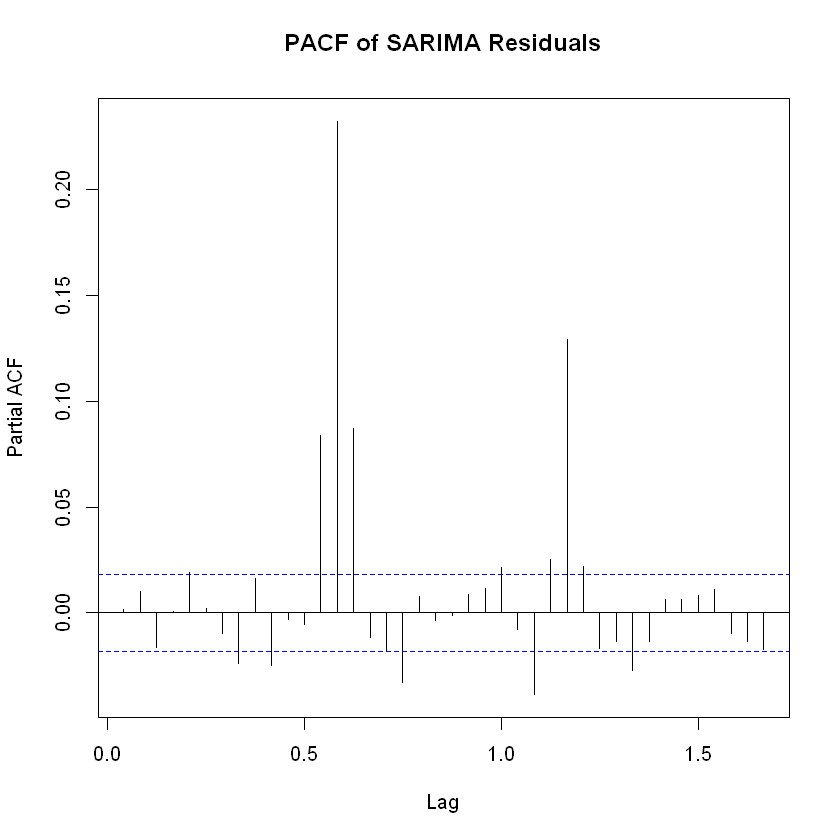

In [201]:
# Ensure 'final_data' is ordered by datetime
final_data <- final_data %>% arrange(datetime)

# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-11")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-15")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface, 
     data = data)
}

# Fit the model on the initial training data
model0 <- define_model(train_data)
summary(model0)

# Add residuals to train_data
train_data$residuals <- residuals(model0)

# Create a time series object for residuals
ts_residuals <- ts(train_data$residuals, frequency = 24)

# Fit a SARIMA model to the residuals
sarima_model <- Arima(ts_residuals, order = c(3, 0, 2), seasonal = list(order = c(1, 0, 1), period = 24))
summary(sarima_model)

# Check residuals of the SARIMA model
checkresiduals(sarima_model)

# Plot ACF and PACF of residuals
acf(residuals(sarima_model), main = "ACF of SARIMA Residuals")
pacf(residuals(sarima_model), main = "PACF of SARIMA Residuals")

# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date, model) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  if (nrow(prediction_data) > 0) {
    predictions <- predict(model, newdata = prediction_data)
    predictions[predictions < 0] <- 0  # Set negative predictions to 0
    
    results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
    return(results)
  } else {
    print(paste("No data for prediction date:", prediction_date))
    return(NULL)
  }
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-13 00:00:00"
prediction_end_date <- "2024-05-26 23:00:00"



Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0227 -0.9989  0.0891  1.2250  8.7582 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -4.129e+01  8.708e-01 -47.421  < 2e-16 ***
hourhour06                5.695e-01  9.135e-02   6.234 4.69e-10 ***
hourhour07                2.489e+00  9.156e-02  27.184  < 2e-16 ***
hourhour08                4.550e+00  9.316e-02  48.845  < 2e-16 ***
hourhour09                5.612e+00  9.727e-02  57.698  < 2e-16 ***
hourhour10                5.031e+00  1.048e-01  48.020  < 2e-16 ***
hourhour11                4.529e+00  1.096e-01  41.303  < 2e-16 ***
hourhour12                4.072e+00  1.132e-01  35.971  < 2e-16 ***
hourhour13                3.515e+00  1.146e-01  30.670  < 2e-16 ***
hourhour14                2.574e+00

Series: ts_residuals 
ARIMA(3,0,2)(1,0,1)[24] with non-zero mean 

Coefficients:
         ar1     ar2      ar3     ma1      ma2    sar1     sma1    mean
      0.1545  0.7324  -0.3948  0.5472  -0.4245  0.5097  -0.5343  0.0005
s.e.  0.0526  0.0219   0.0313  0.0552   0.0533  0.1034   0.1040  0.0276

sigma^2 = 2.044:  log likelihood = -20977.28
AIC=41972.57   AICc=41972.58   BIC=42038.96

Training set error measures:
                        ME     RMSE      MAE      MPE     MAPE      MASE
Training set -0.0002521003 1.429198 1.048401 796.0527 1072.506 0.4965697
                    ACF1
Training set 0.001556447


	Ljung-Box test

data:  Residuals from ARIMA(3,0,2)(1,0,1)[24] with non-zero mean
Q* = 1766.6, df = 41, p-value < 2.2e-16

Model df: 7.   Total lags used: 48



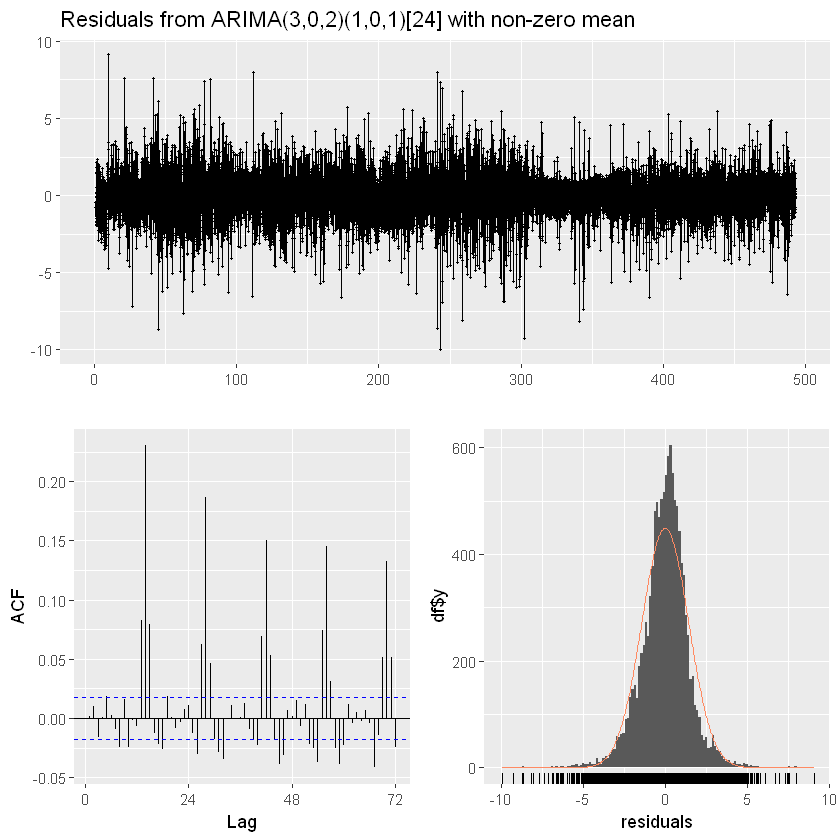

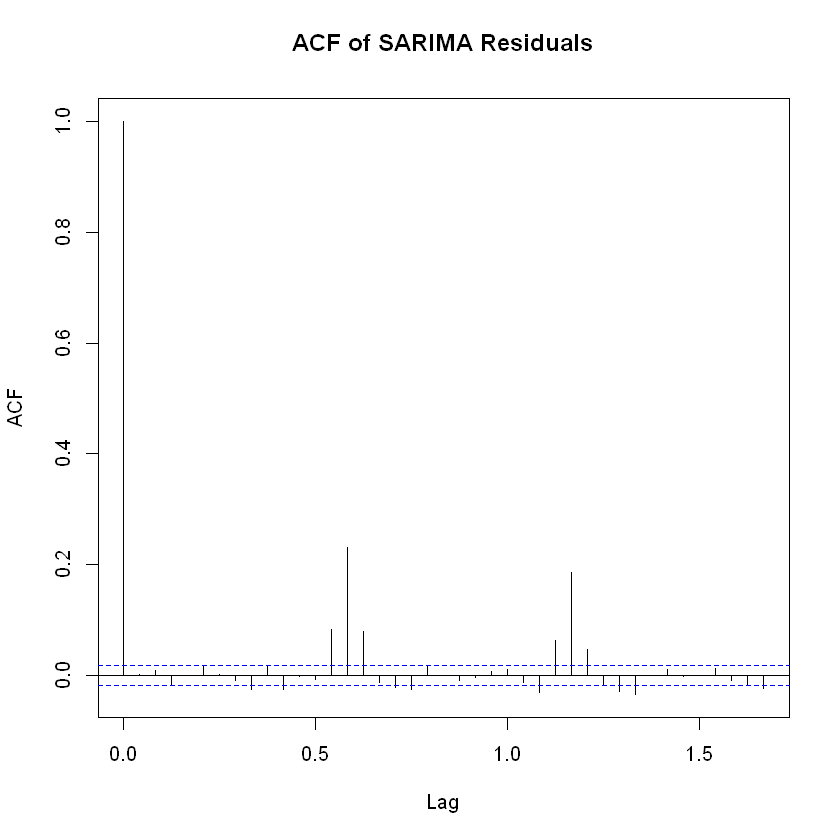

               datetime prediction
1   2024-05-13 05:00:00 0.00000000
2   2024-05-13 06:00:00 0.46074240
3   2024-05-13 07:00:00 2.58640995
4   2024-05-13 08:00:00 4.90257769
5   2024-05-13 09:00:00 6.37281886
6   2024-05-13 10:00:00 6.40998009
7   2024-05-13 11:00:00 6.60868964
8   2024-05-13 12:00:00 6.58845758
9   2024-05-13 13:00:00 6.15542479
10  2024-05-13 14:00:00 4.79406278
11  2024-05-13 15:00:00 2.89834353
12  2024-05-13 16:00:00 1.13234726
13  2024-05-13 17:00:00 0.08119822
14  2024-05-13 18:00:00 0.00000000
15  2024-05-14 05:00:00 0.00000000
16  2024-05-14 06:00:00 0.25400416
17  2024-05-14 07:00:00 2.42761024
18  2024-05-14 08:00:00 4.86410288
19  2024-05-14 09:00:00 6.64856232
20  2024-05-14 10:00:00 8.17413504
21  2024-05-14 11:00:00 8.47798217
22  2024-05-14 12:00:00 8.78571872
23  2024-05-14 13:00:00 8.61577614
24  2024-05-14 14:00:00 7.77373428
25  2024-05-14 15:00:00 6.12787839
26  2024-05-14 16:00:00 4.38449204
27  2024-05-14 17:00:00 2.83634913
28  2024-05-14 18:00

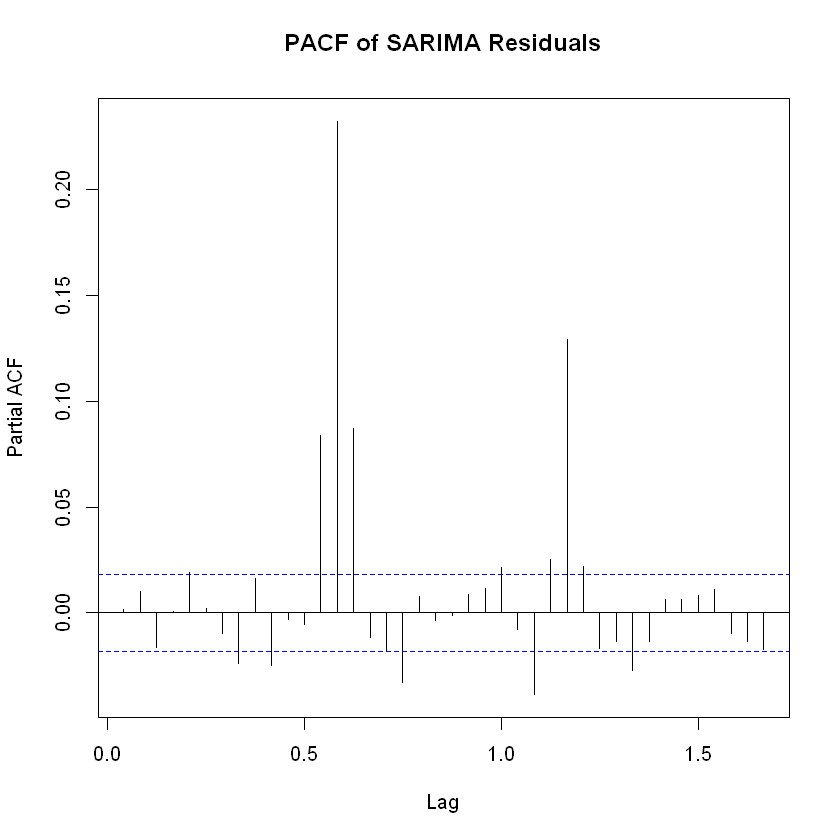

In [202]:
# Ensure 'final_data' is ordered by datetime
final_data <- final_data %>% arrange(datetime)

# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-11")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-15")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface, 
     data = data)
}

# Fit the model on the initial training data
model0 <- define_model(train_data)
summary(model0)

# Add residuals to train_data
train_data$residuals <- residuals(model0)

# Create a time series object for residuals
ts_residuals <- ts(train_data$residuals, frequency = 24)

# Fit a SARIMA model to the residuals
sarima_model <- Arima(ts_residuals, order = c(3, 0, 2), seasonal = list(order = c(1, 0, 1), period = 24))
summary(sarima_model)

# Check residuals of the SARIMA model
checkresiduals(sarima_model)

# Plot ACF and PACF of residuals
acf(residuals(sarima_model), main = "ACF of SARIMA Residuals")
pacf(residuals(sarima_model), main = "PACF of SARIMA Residuals")

# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date, model) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  if (nrow(prediction_data) > 0) {
    predictions <- predict(model, newdata = prediction_data)
    predictions[predictions < 0] <- 0  # Set negative predictions to 0
    
    results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
    return(results)
  } else {
    print(paste("No data for prediction date:", start_date))
    return(NULL)
  }
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-13 00:00:00"
prediction_end_date <- "2024-05-26 23:00:00"

# Get predictions for the specified dates
predictions1 <- make_predictions(prediction_start_date, prediction_end_date, model0)

# Print the predictions
print(predictions1)


Call:
lm(formula = production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
    avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0227 -0.9989  0.0891  1.2250  8.7582 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -4.129e+01  8.708e-01 -47.421  < 2e-16 ***
hourhour06                5.695e-01  9.135e-02   6.234 4.69e-10 ***
hourhour07                2.489e+00  9.156e-02  27.184  < 2e-16 ***
hourhour08                4.550e+00  9.316e-02  48.845  < 2e-16 ***
hourhour09                5.612e+00  9.727e-02  57.698  < 2e-16 ***
hourhour10                5.031e+00  1.048e-01  48.020  < 2e-16 ***
hourhour11                4.529e+00  1.096e-01  41.303  < 2e-16 ***
hourhour12                4.072e+00  1.132e-01  35.971  < 2e-16 ***
hourhour13                3.515e+00  1.146e-01  30.670  < 2e-16 ***
hourhour14                2.574e+00

Series: ts_residuals 
ARIMA(3,0,2) with non-zero mean 

Coefficients:
         ar1     ar2      ar3     ma1      ma2    mean
      0.2045  0.7489  -0.4257  0.4990  -0.4720  0.0000
s.e.  0.0449  0.0210   0.0273  0.0475   0.0479  0.0286

sigma^2 = 2.045:  log likelihood = -20980.32
AIC=41974.65   AICc=41974.65   BIC=42026.28

Training set error measures:
                        ME     RMSE      MAE      MPE     MAPE      MASE
Training set -7.107745e-06 1.429567 1.049432 893.2708 1170.996 0.4970584
                      ACF1
Training set -0.0003369092


	Ljung-Box test

data:  Residuals from ARIMA(3,0,2) with non-zero mean
Q* = 1788.9, df = 43, p-value < 2.2e-16

Model df: 5.   Total lags used: 48



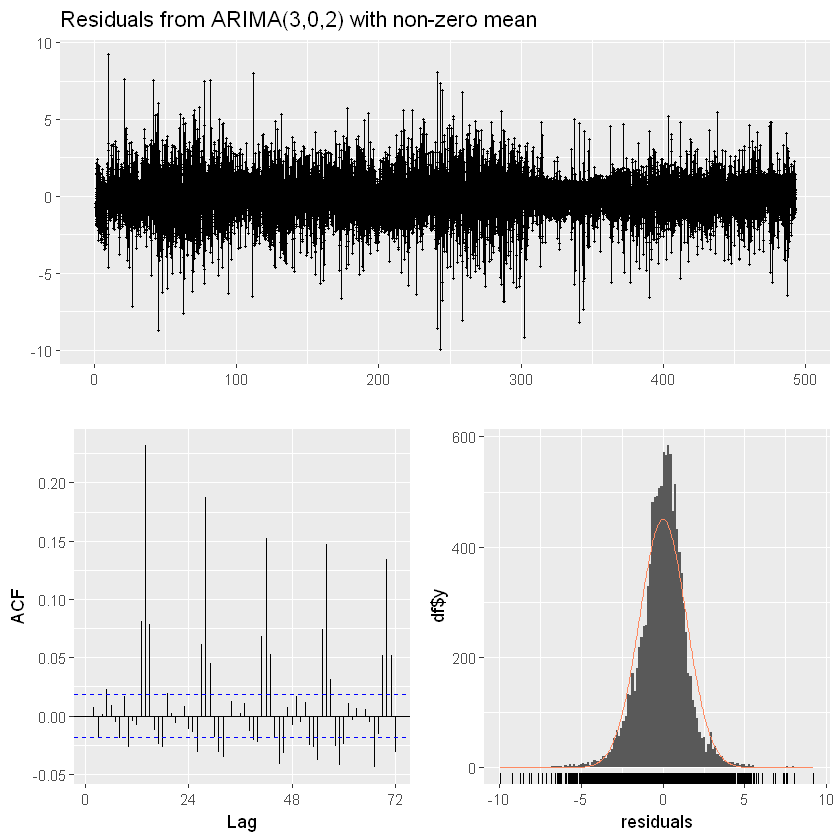

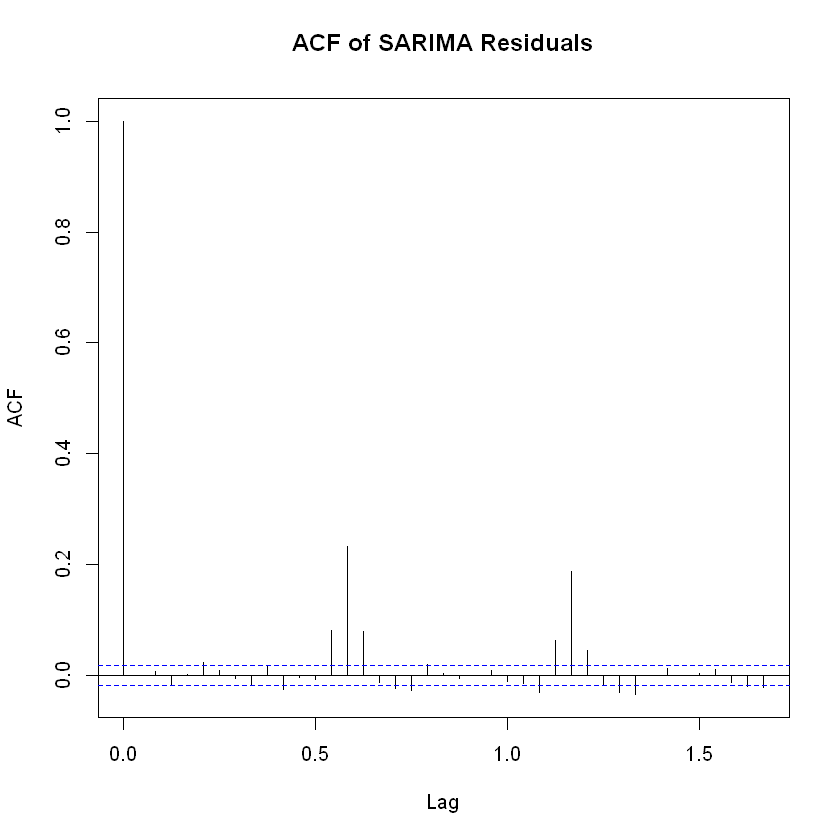

               datetime prediction
1   2024-05-13 05:00:00 0.00000000
2   2024-05-13 06:00:00 0.46074240
3   2024-05-13 07:00:00 2.58640995
4   2024-05-13 08:00:00 4.90257769
5   2024-05-13 09:00:00 6.37281886
6   2024-05-13 10:00:00 6.40998009
7   2024-05-13 11:00:00 6.60868964
8   2024-05-13 12:00:00 6.58845758
9   2024-05-13 13:00:00 6.15542479
10  2024-05-13 14:00:00 4.79406278
11  2024-05-13 15:00:00 2.89834353
12  2024-05-13 16:00:00 1.13234726
13  2024-05-13 17:00:00 0.08119822
14  2024-05-13 18:00:00 0.00000000
15  2024-05-14 05:00:00 0.00000000
16  2024-05-14 06:00:00 0.25400416
17  2024-05-14 07:00:00 2.42761024
18  2024-05-14 08:00:00 4.86410288
19  2024-05-14 09:00:00 6.64856232
20  2024-05-14 10:00:00 8.17413504
21  2024-05-14 11:00:00 8.47798217
22  2024-05-14 12:00:00 8.78571872
23  2024-05-14 13:00:00 8.61577614
24  2024-05-14 14:00:00 7.77373428
25  2024-05-14 15:00:00 6.12787839
26  2024-05-14 16:00:00 4.38449204
27  2024-05-14 17:00:00 2.83634913
28  2024-05-14 18:00

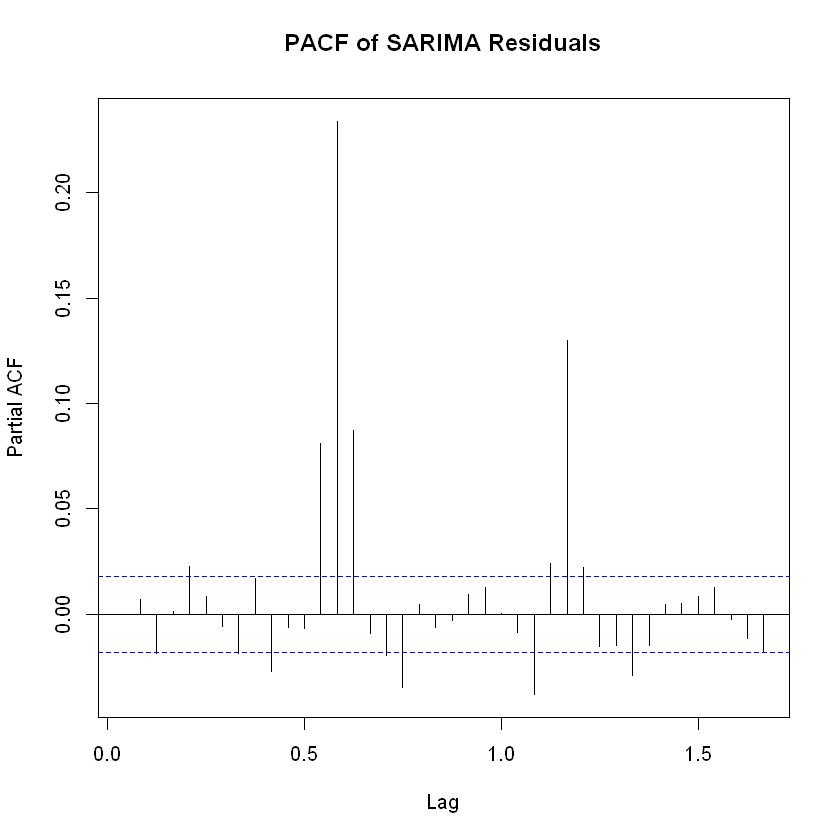

In [203]:

# Ensure 'final_data' is ordered by datetime
final_data <- final_data %>% arrange(datetime)

# Define the initial train and test periods
train_start_date <- as.Date("2022-01-01")
train_end_date <- as.Date("2024-05-11")
test_start_date <- as.Date("2024-02-01")
test_end_date <- as.Date("2024-05-15")

# Prepare train and test datasets
train_data <- final_data %>%
  filter(datetime >= train_start_date & datetime <= train_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

test_data <- final_data %>%
  filter(datetime >= test_start_date & datetime <= test_end_date) %>%
  mutate(hour = factor(hour, levels = hour_levels),
         season = factor(season, levels = season_levels))

# Model Definition
define_model <- function(data) {
  lm(production ~ hour + season + avg_TMP_surface + avg_USWRF_surface + 
       avg_TCDC_low_cloud_layer + avg_DLWRF_surface + avg_CSNOW_surface, 
     data = data)
}

# Fit the model on the initial training data
model0 <- define_model(train_data)
summary(model0)

# Add residuals to train_data
train_data$residuals <- residuals(model0)

# Create a time series object for residuals
ts_residuals <- ts(train_data$residuals, frequency = 24)

# Fit a non-seasonal ARIMA(3, 0, 2) model to the residuals
arima_model <- Arima(ts_residuals, order = c(3, 0, 2))
summary(arima_model)

# Check residuals of the SARIMA model
checkresiduals(arima_model)

# Plot ACF and PACF of residuals
acf(residuals(arima_model), main = "ACF of SARIMA Residuals")
pacf(residuals(arima_model), main = "PACF of SARIMA Residuals")

# Function to make predictions for the specified date range
make_predictions <- function(start_date, end_date, model) {
  prediction_datetime <- seq(as.POSIXct(start_date, format="%Y-%m-%d %H:%M:%S"),
                             as.POSIXct(end_date, format="%Y-%m-%d %H:%M:%S"),
                             by = "hour")
  
  prediction_data <- final_data %>%
    filter(datetime %in% prediction_datetime) %>%
    mutate(hour = factor(hour, levels = hour_levels),
           season = factor(season, levels = season_levels))
  
  if (nrow(prediction_data) > 0) {
    predictions <- predict(model, newdata = prediction_data)
    predictions[predictions < 0] <- 0  # Set negative predictions to 0
    
    results <- data.frame(datetime = prediction_data$datetime, prediction = predictions)
    return(results)
  } else {
    print(paste("No data for prediction date:", start_date))
    return(NULL)
  }
}

# Define the specific date range for predictions
prediction_start_date <- "2024-05-13 00:00:00"
prediction_end_date <- "2024-05-26 23:00:00"

# Get predictions for the specified dates
predictions <- make_predictions(prediction_start_date, prediction_end_date, model0)

# Print the predictions
print(predictions)

In [204]:
# Ensure the final_data dataframe contains the actual production values
# for the corresponding datetime
merged_results <- predictions1 %>%
  left_join(final_data %>% select(datetime, production), by = "datetime")

# Set negative prediction values to 0 since there can not be negative production
merged_results$prediction <- ifelse(merged_results$prediction < 0, 0, merged_results$prediction)

print(merged_results)

               datetime prediction production
1   2024-05-13 05:00:00 0.00000000       0.76
2   2024-05-13 06:00:00 0.46074240       2.69
3   2024-05-13 07:00:00 2.58640995       5.75
4   2024-05-13 08:00:00 4.90257769       9.24
5   2024-05-13 09:00:00 6.37281886       8.88
6   2024-05-13 10:00:00 6.40998009       7.85
7   2024-05-13 11:00:00 6.60868964       8.36
8   2024-05-13 12:00:00 6.58845758       5.34
9   2024-05-13 13:00:00 6.15542479       4.04
10  2024-05-13 14:00:00 4.79406278       5.89
11  2024-05-13 15:00:00 2.89834353       5.32
12  2024-05-13 16:00:00 1.13234726       3.62
13  2024-05-13 17:00:00 0.08119822       1.30
14  2024-05-13 18:00:00 0.00000000       0.16
15  2024-05-14 05:00:00 0.00000000       0.96
16  2024-05-14 06:00:00 0.25400416       2.59
17  2024-05-14 07:00:00 2.42761024       4.14
18  2024-05-14 08:00:00 4.86410288       7.60
19  2024-05-14 09:00:00 6.64856232       8.83
20  2024-05-14 10:00:00 8.17413504       7.44
21  2024-05-14 11:00:00 8.47798217

In [205]:
# Calculate WMAPE
wmape <- sum(abs(merged_results$production - merged_results$prediction)) / sum(merged_results$production)

# Print WMAPE
print(paste("WMAPE:", round(wmape * 100, 2), "%"))

[1] "WMAPE: 28.89 %"


In [206]:
# Ensure the final_data dataframe contains the actual production values
# for the corresponding datetime
merged_results2 <- predictions2 %>%
  left_join(final_data %>% select(datetime, production), by = "datetime")

# Set negative prediction values to 0 since there can not be negative production
merged_results2$prediction <- ifelse(merged_results2$prediction < 0, 0, merged_results2$prediction)

print(merged_results2)

               datetime prediction production
1   2024-05-13 05:00:00 0.00000000       0.76
2   2024-05-13 06:00:00 0.46074240       2.69
3   2024-05-13 07:00:00 2.58640995       5.75
4   2024-05-13 08:00:00 4.90257769       9.24
5   2024-05-13 09:00:00 6.37281886       8.88
6   2024-05-13 10:00:00 6.40998009       7.85
7   2024-05-13 11:00:00 6.60868964       8.36
8   2024-05-13 12:00:00 6.58845758       5.34
9   2024-05-13 13:00:00 6.15542479       4.04
10  2024-05-13 14:00:00 4.79406278       5.89
11  2024-05-13 15:00:00 2.89834353       5.32
12  2024-05-13 16:00:00 1.13234726       3.62
13  2024-05-13 17:00:00 0.08119822       1.30
14  2024-05-13 18:00:00 0.00000000       0.16
15  2024-05-14 05:00:00 0.00000000       0.96
16  2024-05-14 06:00:00 0.25400416       2.59
17  2024-05-14 07:00:00 2.42761024       4.14
18  2024-05-14 08:00:00 4.86410288       7.60
19  2024-05-14 09:00:00 6.64856232       8.83
20  2024-05-14 10:00:00 8.17413504       7.44
21  2024-05-14 11:00:00 8.47798217

In [207]:
# Calculate WMAPE
wmape <- sum(abs(merged_results2$production - merged_results2$prediction)) / sum(merged_results2$production)

# Print WMAPE
print(paste("WMAPE:", round(wmape * 100, 2), "%"))

[1] "WMAPE: 28.89 %"


- Lastly tried auto_arima to check if it makes any difference in the results.

Series: ts_residuals 
ARIMA(3,0,0) with zero mean 

Coefficients:
         ar1      ar2      ar3
      0.7017  -0.0611  -0.0806
s.e.  0.0092   0.0112   0.0092

sigma^2 = 2.049:  log likelihood = -20994.28
AIC=41996.57   AICc=41996.57   BIC=42026.07

Training set error measures:
                        ME     RMSE      MAE      MPE     MAPE      MASE
Training set -1.778999e-05 1.431263 1.050453 867.9456 1143.824 0.4975415
                     ACF1
Training set 0.0001353404


	Ljung-Box test

data:  Residuals from ARIMA(3,0,0) with zero mean
Q* = 1799, df = 45, p-value < 2.2e-16

Model df: 3.   Total lags used: 48



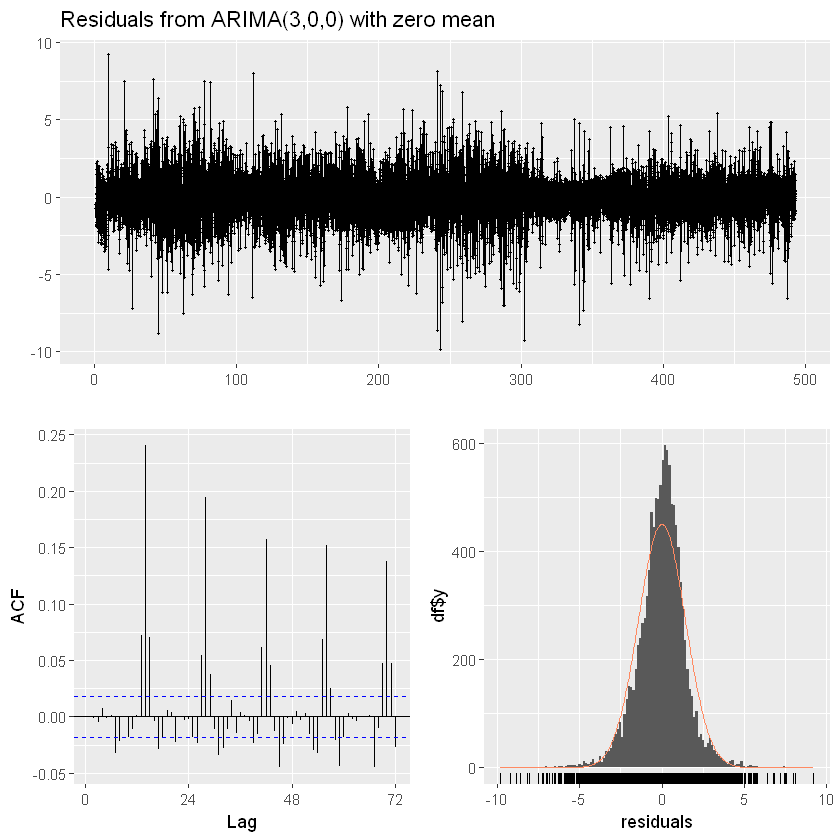

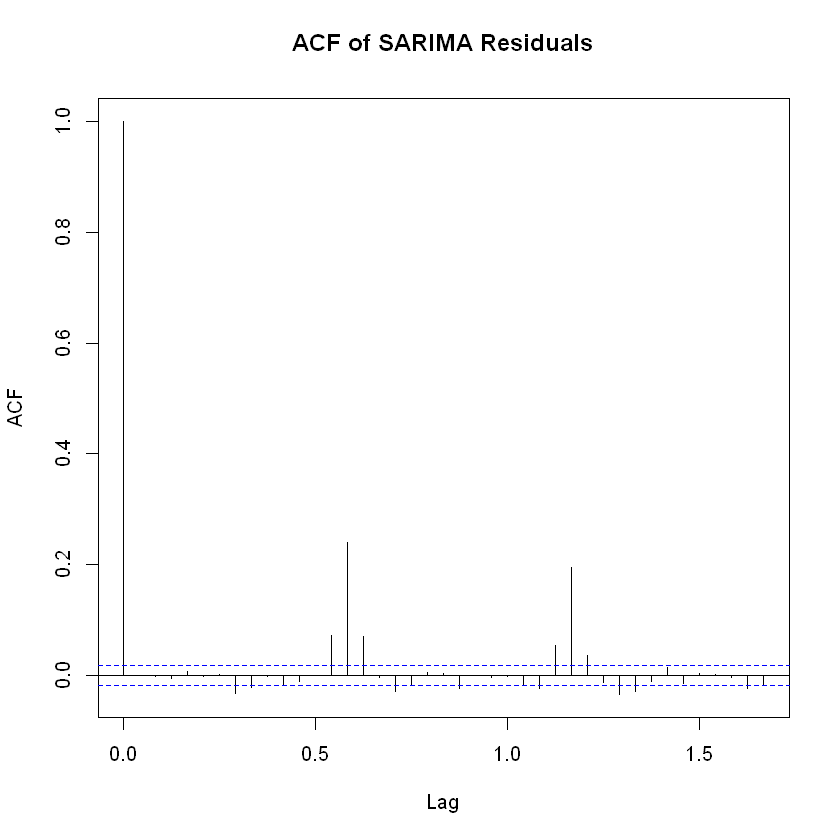

               datetime prediction
1   2024-05-13 05:00:00 0.00000000
2   2024-05-13 06:00:00 0.46074240
3   2024-05-13 07:00:00 2.58640995
4   2024-05-13 08:00:00 4.90257769
5   2024-05-13 09:00:00 6.37281886
6   2024-05-13 10:00:00 6.40998009
7   2024-05-13 11:00:00 6.60868964
8   2024-05-13 12:00:00 6.58845758
9   2024-05-13 13:00:00 6.15542479
10  2024-05-13 14:00:00 4.79406278
11  2024-05-13 15:00:00 2.89834353
12  2024-05-13 16:00:00 1.13234726
13  2024-05-13 17:00:00 0.08119822
14  2024-05-13 18:00:00 0.00000000
15  2024-05-14 05:00:00 0.00000000
16  2024-05-14 06:00:00 0.25400416
17  2024-05-14 07:00:00 2.42761024
18  2024-05-14 08:00:00 4.86410288
19  2024-05-14 09:00:00 6.64856232
20  2024-05-14 10:00:00 8.17413504
21  2024-05-14 11:00:00 8.47798217
22  2024-05-14 12:00:00 8.78571872
23  2024-05-14 13:00:00 8.61577614
24  2024-05-14 14:00:00 7.77373428
25  2024-05-14 15:00:00 6.12787839
26  2024-05-14 16:00:00 4.38449204
27  2024-05-14 17:00:00 2.83634913
28  2024-05-14 18:00

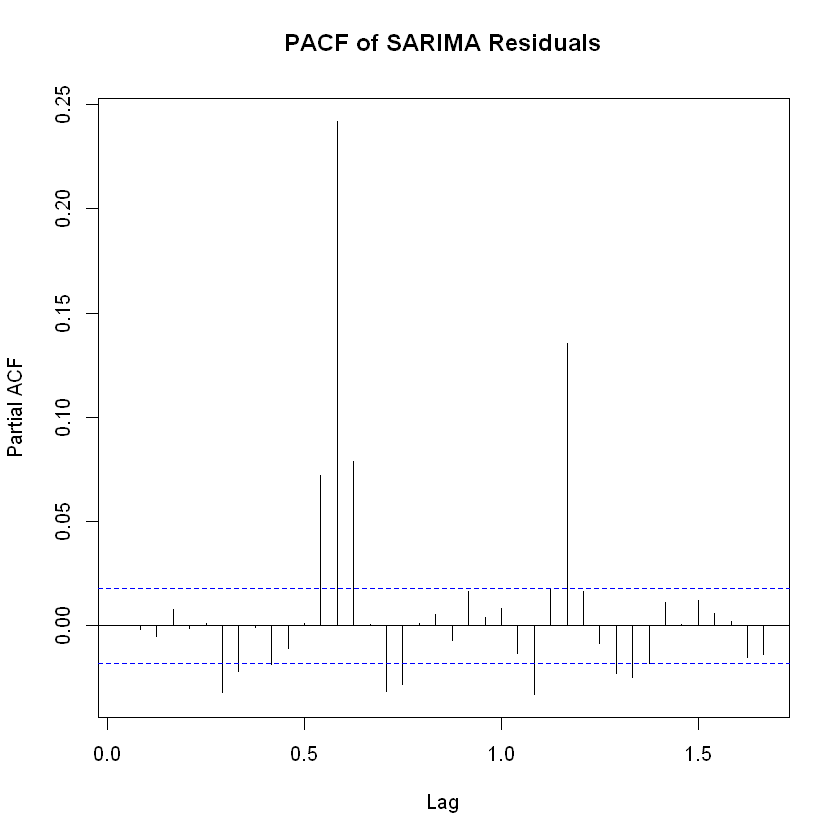

In [208]:
# Use auto.arima to fit the best ARIMA model to the residuals
auto_arima_model <- auto.arima(ts_residuals)
summary(auto_arima_model)

# Check residuals of the auto.arima model
checkresiduals(auto_arima_model)

# Plot ACF and PACF of residuals
acf(residuals(auto_arima_model), main = "ACF of SARIMA Residuals")
pacf(residuals(auto_arima_model), main = "PACF of SARIMA Residuals")

# Get predictions for the specified dates
predictions3 <- make_predictions(prediction_start_date, prediction_end_date, model0)

# Print the predictions
print(predictions3)

In [209]:
# Ensure the final_data dataframe contains the actual production values
# for the corresponding datetime
merged_results3 <- predictions3 %>%
  left_join(final_data %>% select(datetime, production), by = "datetime")

# Set negative prediction values to 0 since there can not be negative production
merged_results3$prediction <- ifelse(merged_results2$prediction < 0, 0, merged_results2$prediction)

print(merged_results3)

               datetime prediction production
1   2024-05-13 05:00:00 0.00000000       0.76
2   2024-05-13 06:00:00 0.46074240       2.69
3   2024-05-13 07:00:00 2.58640995       5.75
4   2024-05-13 08:00:00 4.90257769       9.24
5   2024-05-13 09:00:00 6.37281886       8.88
6   2024-05-13 10:00:00 6.40998009       7.85
7   2024-05-13 11:00:00 6.60868964       8.36
8   2024-05-13 12:00:00 6.58845758       5.34
9   2024-05-13 13:00:00 6.15542479       4.04
10  2024-05-13 14:00:00 4.79406278       5.89
11  2024-05-13 15:00:00 2.89834353       5.32
12  2024-05-13 16:00:00 1.13234726       3.62
13  2024-05-13 17:00:00 0.08119822       1.30
14  2024-05-13 18:00:00 0.00000000       0.16
15  2024-05-14 05:00:00 0.00000000       0.96
16  2024-05-14 06:00:00 0.25400416       2.59
17  2024-05-14 07:00:00 2.42761024       4.14
18  2024-05-14 08:00:00 4.86410288       7.60
19  2024-05-14 09:00:00 6.64856232       8.83
20  2024-05-14 10:00:00 8.17413504       7.44
21  2024-05-14 11:00:00 8.47798217

In [210]:
# Calculate WMAPE
wmape <- sum(abs(merged_results3$production - merged_results3$prediction)) / sum(merged_results3$production)

# Print WMAPE
print(paste("WMAPE:", round(wmape * 100, 2), "%"))

[1] "WMAPE: 28.89 %"


- Concluded that our last decided linear model was the best looking at the WMAPE's.